# Limpeza dos dados

In [277]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [278]:
df_selic = pd.read_csv("./SELIC.csv")
df_selic.head()

,Data,selic_meta
0,01.04.2013,"7,25"
1,02.04.2013,"7,25"
2,03.04.2013,"7,25"
3,04.04.2013,"7,25"
4,05.04.2013,"7,25"


In [279]:
df_selic["Data"] = pd.to_datetime(df_selic["Data"], format="%d.%m.%Y")
df_selic.set_index("Data", inplace=True)
df_selic.head()

,selic_meta
Data,
2013-04-01,"7,25"
2013-04-02,"7,25"
2013-04-03,"7,25"
2013-04-04,"7,25"
2013-04-05,"7,25"


In [280]:
df_selic["selic_meta"] = df_selic["selic_meta"].str.replace(".", "").str.replace(",", ".").astype(float)
df_selic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4226 entries, 2013-04-01 to 2024-10-25
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   selic_meta  4226 non-null   float64
dtypes: float64(1)
memory usage: 66.0 KB


In [281]:
df_bbrc = pd.read_csv("./BBRC11 Dados Históricos.csv")
df_bbrc.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,01.04.2013,"107,20","107,15","107,20","107,15","0,23K","-1,24%"
1,02.04.2013,"107,58","109,48","109,48","106,61","1,10K","0,35%"
2,03.04.2013,"107,09","107,09","107,09","106,61","1,49K","-0,46%"
3,04.04.2013,"106,61","107,09","108,54","106,61","1,34K","-0,45%"
4,05.04.2013,"105,74","106,71","106,71","105,64","4,83K","-0,82%"


In [282]:
df_bbrc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2871 entries, 0 to 2870
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Data      2871 non-null   object
 1   Último    2871 non-null   object
 2   Abertura  2871 non-null   object
 3   Máxima    2871 non-null   object
 4   Mínima    2871 non-null   object
 5   Vol.      2866 non-null   object
 6   Var%      2871 non-null   object
dtypes: object(7)
memory usage: 157.1+ KB


In [283]:
df_bbrc.columns = ["Data", "Ultimo", "Abertura", "Max", "Min", "Vol", "Var"]

In [284]:
df_bbrc.columns

Index(['Data', 'Ultimo', 'Abertura', 'Max', 'Min', 'Vol', 'Var'], dtype='object')

In [285]:
df_bbrc["Data"] = pd.to_datetime(df_bbrc["Data"], format="%d.%m.%Y")
df_bbrc.set_index("Data", inplace=True)
df_bbrc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2871 entries, 2013-04-01 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Ultimo    2871 non-null   object
 1   Abertura  2871 non-null   object
 2   Max       2871 non-null   object
 3   Min       2871 non-null   object
 4   Vol       2866 non-null   object
 5   Var       2871 non-null   object
dtypes: object(6)
memory usage: 157.0+ KB


In [286]:
df_bbrc.head()

,Ultimo,Abertura,Max,Min,Vol,Var
Data,,,,,,
2013-04-01,"107,20","107,15","107,20","107,15","0,23K","-1,24%"
2013-04-02,"107,58","109,48","109,48","106,61","1,10K","0,35%"
2013-04-03,"107,09","107,09","107,09","106,61","1,49K","-0,46%"
2013-04-04,"106,61","107,09","108,54","106,61","1,34K","-0,45%"
2013-04-05,"105,74","106,71","106,71","105,64","4,83K","-0,82%"


In [287]:
for coluna in ["Ultimo", "Abertura", "Max", "Min"]:
    df_bbrc[coluna] = df_bbrc[coluna].str.replace(".", "").str.replace(",", ".").astype(float)

df_bbrc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2871 entries, 2013-04-01 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    2871 non-null   float64
 1   Abertura  2871 non-null   float64
 2   Max       2871 non-null   float64
 3   Min       2871 non-null   float64
 4   Vol       2866 non-null   object 
 5   Var       2871 non-null   object 
dtypes: float64(4), object(2)
memory usage: 157.0+ KB


In [288]:
df_bbrc.head()

,Ultimo,Abertura,Max,Min,Vol,Var
Data,,,,,,
2013-04-01,107.20,107.15,107.20,107.15,"0,23K","-1,24%"
2013-04-02,107.58,109.48,109.48,106.61,"1,10K","0,35%"
2013-04-03,107.09,107.09,107.09,106.61,"1,49K","-0,46%"
2013-04-04,106.61,107.09,108.54,106.61,"1,34K","-0,45%"
2013-04-05,105.74,106.71,106.71,105.64,"4,83K","-0,82%"


In [289]:
df_bbrc["Vol"] = df_bbrc["Vol"].apply(lambda x: pd.eval(x.replace(",", ".").replace("K", "*1e3").replace("M", "*1e6")) if pd.notnull(x) else None)
df_bbrc["Vol"] = df_bbrc["Vol"].fillna(df_bbrc["Vol"].rolling(window=5, min_periods=1).mean())
df_bbrc.head()

,Ultimo,Abertura,Max,Min,Vol,Var
Data,,,,,,
2013-04-01,107.20,107.15,107.20,107.15,230.0,"-1,24%"
2013-04-02,107.58,109.48,109.48,106.61,1100.0,"0,35%"
2013-04-03,107.09,107.09,107.09,106.61,1490.0,"-0,46%"
2013-04-04,106.61,107.09,108.54,106.61,1340.0,"-0,45%"
2013-04-05,105.74,106.71,106.71,105.64,4830.0,"-0,82%"


In [290]:
df_bbrc["Var"] = df_bbrc["Var"].str.replace("%", "").str.replace(".", "").str.replace(",", ".").astype(float) / 100
df_bbrc.head()

,Ultimo,Abertura,Max,Min,Vol,Var
Data,,,,,,
2013-04-01,107.20,107.15,107.20,107.15,230.0,-0.0124
2013-04-02,107.58,109.48,109.48,106.61,1100.0,0.0035
2013-04-03,107.09,107.09,107.09,106.61,1490.0,-0.0046
2013-04-04,106.61,107.09,108.54,106.61,1340.0,-0.0045
2013-04-05,105.74,106.71,106.71,105.64,4830.0,-0.0082


In [291]:
df_bbrc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2871 entries, 2013-04-01 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    2871 non-null   float64
 1   Abertura  2871 non-null   float64
 2   Max       2871 non-null   float64
 3   Min       2871 non-null   float64
 4   Vol       2871 non-null   float64
 5   Var       2871 non-null   float64
dtypes: float64(6)
memory usage: 157.0 KB


In [292]:
df_bbrc.describe()

,Ultimo,Abertura,Max,Min,Vol,Var
count,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000,2871.000000
mean,104.255214,104.270003,105.029815,103.399269,1238.426506,-0.000142
std,20.542757,20.535302,20.610453,20.393947,1266.323224,0.023998
min,60.700000,61.580000,62.240000,60.700000,0.000000,-0.991600
25%,86.515000,86.590000,87.405000,85.960000,510.000000,-0.004600
50%,102.260000,102.270000,103.000000,101.400000,910.000000,0.000000
75%,121.355000,121.195000,122.200000,119.985000,1530.000000,0.004700
max,161.800000,161.800000,162.990000,159.100000,23110.000000,0.184100


In [293]:
def limpar_dados(data_frame):
    data_frame.columns = ["Data", "Ultimo", "Abertura", "Max", "Min", "Vol", "Var"]
    data_frame["Data"] = pd.to_datetime(data_frame["Data"], format="%d.%m.%Y")
    data_frame.set_index("Data", inplace=True)
    for coluna in ["Ultimo", "Abertura", "Max", "Min"]:
        data_frame[coluna] = data_frame[coluna].str.replace(".", "").str.replace(",", ".").astype(float)
    data_frame["Vol"] = data_frame["Vol"].apply(lambda x: pd.eval(x.replace(",", ".").replace("K", "*1e3").replace("M", "*1e6")) if pd.notnull(x) else None)
    data_frame["Vol"] = data_frame["Vol"].fillna(data_frame["Vol"].rolling(window=5, min_periods=1).mean())
    data_frame["Var"] = data_frame["Var"].str.replace("%", "").str.replace(".", "").str.replace(",", ".").astype(float) / 100
    return data_frame

In [294]:
df_bova = pd.read_csv("./BOVA11 - Histórico.csv")
df_bova.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,01.04.2013,"54,80","54,90","55,21","54,79","775,66K","-0,54%"
1,02.04.2013,"53,75","54,92","55,05","53,73","1,05M","-1,92%"
2,03.04.2013,"54,45","53,80","54,45","53,65","1,22M","1,30%"
3,04.04.2013,"53,50","54,46","54,46","53,33","2,74M","-1,74%"
4,05.04.2013,"54,08","53,01","54,14","52,79","2,64M","1,08%"


In [295]:
df_bova = limpar_dados(df_bova)
df_bova.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2878 entries, 2013-04-01 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    2878 non-null   float64
 1   Abertura  2878 non-null   float64
 2   Max       2878 non-null   float64
 3   Min       2878 non-null   float64
 4   Vol       2878 non-null   float64
 5   Var       2878 non-null   float64
dtypes: float64(6)
memory usage: 157.4 KB


In [296]:
df_bova.describe()

,Ultimo,Abertura,Max,Min,Vol,Var
count,2878.000000,2878.000000,2878.000000,2878.000000,2.878000e+03,2878.000000
mean,82.867790,82.908026,83.573798,82.168885,4.975614e+06,0.000408
std,27.441019,27.437748,27.555482,27.307514,3.872774e+06,0.015351
min,36.450000,36.320000,36.610000,36.010000,3.635500e+05,-0.145700
25%,54.152500,54.247500,54.722500,53.672500,2.270000e+06,-0.007700
50%,83.210000,83.540000,84.205000,82.550000,4.030000e+06,0.000700
75%,107.530000,107.600000,108.625000,106.685000,6.597500e+06,0.008900
max,133.620000,133.290000,133.780000,132.930000,4.590000e+07,0.134000


In [297]:
df_rbvo = pd.read_csv("./RBvO11 Dados Históricos.csv")
df_rbvo.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,01.04.2013,"87,79","87,87","87,96","87,79","1,71K","-0,49%"
1,02.04.2013,"88,05","88,62","88,62","88,04","0,13K","0,30%"
2,03.04.2013,"87,44","86,95","88,22","86,95","0,09K","-0,69%"
3,04.04.2013,"87,79","87,79","88,13","87,79","0,44K","0,40%"
4,05.04.2013,"87,40","87,96","87,96","86,05","0,99K","-0,44%"


In [298]:
df_rbvo = limpar_dados(df_rbvo)
df_rbvo.head()

,Ultimo,Abertura,Max,Min,Vol,Var
Data,,,,,,
2013-04-01,87.79,87.87,87.96,87.79,1710.0,-0.0049
2013-04-02,88.05,88.62,88.62,88.04,130.0,0.0030
2013-04-03,87.44,86.95,88.22,86.95,90.0,-0.0069
2013-04-04,87.79,87.79,88.13,87.79,440.0,0.0040
2013-04-05,87.40,87.96,87.96,86.05,990.0,-0.0044


In [299]:
df_rbvo.describe()

,Ultimo,Abertura,Max,Min,Vol,Var
count,2695.000000,2695.000000,2695.00000,2695.000000,2695.000000,2695.000000
mean,39.502223,39.524004,39.84964,39.122197,1267.030612,0.000175
std,29.456825,29.458841,29.57069,29.337406,3675.536273,0.049144
min,4.150000,4.150000,4.33000,4.010000,0.000000,-0.492300
25%,10.175000,10.210000,10.36500,9.935000,120.000000,-0.009200
50%,42.190000,42.240000,42.50000,41.970000,300.000000,0.000000
75%,69.405000,69.510000,69.88000,69.000000,780.000000,0.008400
max,93.610000,93.610000,95.19000,93.610000,51420.000000,0.904100


In [300]:
df_abcp = pd.read_csv("./ABCP11 Dados Históricos.csv")
df_abcp.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,01.04.2013,"33,14","33,14","33,14","33,14","0,20K","-0,99%"
1,02.04.2013,"32,84","32,84","33,47","32,84","0,03K","-0,91%"
2,03.04.2013,"33,47","33,44","33,47","33,44","0,04K","1,92%"
3,04.04.2013,"33,37","33,47","33,47","33,37","0,83K","-0,30%"
4,05.04.2013,"32,94","33,14","33,14","32,94","0,04K","-1,29%"


In [301]:
df_abcp = limpar_dados(df_abcp)
df_abcp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2731 entries, 2013-04-01 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    2731 non-null   float64
 1   Abertura  2731 non-null   float64
 2   Max       2731 non-null   float64
 3   Min       2731 non-null   float64
 4   Vol       2731 non-null   float64
 5   Var       2731 non-null   float64
dtypes: float64(6)
memory usage: 149.4 KB


In [302]:
df_abcp.describe()

,Ultimo,Abertura,Max,Min,Vol,Var
count,2731.000000,2731.000000,2731.000000,2731.000000,2.731000e+03,2731.000000
mean,63.603328,63.645368,64.191282,63.026294,3.066321e+03,0.000571
std,19.437672,19.415780,19.580001,19.239599,4.148104e+04,0.023110
min,28.550000,29.190000,30.130000,28.550000,0.000000e+00,-0.322700
25%,47.520000,47.700000,49.575000,47.170000,1.200000e+02,-0.005100
50%,64.130000,64.250000,64.760000,63.440000,8.900000e+02,0.000000
75%,74.045000,74.060000,74.510000,73.410000,2.470000e+03,0.006250
max,109.500000,110.390000,110.390000,109.000000,2.050000e+06,0.231300


In [303]:
df_jsre = pd.read_csv("./JSRE11 Dados Históricos.csv")
df_jsre.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,01.04.2013,"115,00","111,60","115,00","111,60","0,68K","-0,95%"
1,02.04.2013,"115,00","111,60","115,00","111,60","0,38K","0,00%"
2,03.04.2013,"112,01","115,00","115,00","112,01","0,41K","-2,60%"
3,04.04.2013,"112,05","112,00","112,80","112,00","0,57K","0,04%"
4,05.04.2013,"115,88","113,80","115,88","113,00","1,23K","3,42%"


In [304]:
df_jsre = limpar_dados(df_jsre)
df_jsre.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2862 entries, 2013-04-01 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    2862 non-null   float64
 1   Abertura  2862 non-null   float64
 2   Max       2862 non-null   float64
 3   Min       2862 non-null   float64
 4   Vol       2862 non-null   float64
 5   Var       2862 non-null   float64
dtypes: float64(6)
memory usage: 156.5 KB


In [305]:
df_jsre.describe()

,Ultimo,Abertura,Max,Min,Vol,Var
count,2862.000000,2862.000000,2862.000000,2862.000000,2862.000000,2862.000000
mean,81.993131,82.007921,82.670590,81.254752,20998.009259,-0.000360
std,12.481561,12.442991,12.545851,12.355441,21213.004634,0.021839
min,53.790000,53.880000,54.180000,53.110000,10.000000,-0.917300
25%,72.375000,72.445000,73.010000,71.950000,5982.500000,-0.005500
50%,83.940000,83.940000,84.560000,83.300000,16255.000000,0.000000
75%,89.485000,89.427500,90.000000,88.585000,29647.500000,0.005500
max,122.040000,122.200000,124.440000,121.390000,364650.000000,0.124100


In [306]:
df_kncr = pd.read_csv("./KNCR11 Dados Históricos.csv")
df_kncr.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,01.04.2013,"97,01","95,75","97,01","95,74","5,20K","1,79%"
1,02.04.2013,"96,72","97,01","97,54","95,75","4,05K","-0,30%"
2,03.04.2013,"96,65","96,65","97,10","96,65","2,75K","-0,07%"
3,04.04.2013,"96,20","96,20","96,20","96,20","2,13K","-0,47%"
4,05.04.2013,"96,56","96,20","96,56","93,50","3,35K","0,37%"


In [307]:
df_kncr = limpar_dados(df_kncr)
df_kncr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2878 entries, 2013-04-01 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    2878 non-null   float64
 1   Abertura  2878 non-null   float64
 2   Max       2878 non-null   float64
 3   Min       2878 non-null   float64
 4   Vol       2878 non-null   float64
 5   Var       2878 non-null   float64
dtypes: float64(6)
memory usage: 157.4 KB


In [308]:
df_kncr.describe()

,Ultimo,Abertura,Max,Min,Vol,Var
count,2878.000000,2878.000000,2878.000000,2878.000000,2.878000e+03,2878.000000
mean,93.284104,93.264517,93.767436,92.667272,5.119705e+04,0.000106
std,10.645188,10.653086,10.676373,10.614263,5.512662e+04,0.012218
min,72.310000,71.520000,73.240000,57.410000,1.000000e+02,-0.176300
25%,82.742500,82.700000,83.262500,82.170000,1.431500e+04,-0.002900
50%,94.205000,94.220000,94.715000,93.500000,3.510500e+04,0.000100
75%,102.497500,102.440000,102.870000,102.037500,7.648000e+04,0.003800
max,117.000000,116.980000,117.400000,115.580000,1.160000e+06,0.193400


In [309]:
df_knri = pd.read_csv("./KNRI11 Dados Históricos.csv")
df_knri.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,01.04.2013,"174,94","170,45","180,42","170,45","11,30K","2,21%"
1,02.04.2013,"171,70","170,45","180,42","170,45","5,44K","-1,85%"
2,03.04.2013,"173,04","173,94","174,24","170,65","4,48K","0,78%"
3,04.04.2013,"174,34","174,44","174,44","173,05","3,51K","0,75%"
4,05.04.2013,"172,45","174,33","174,34","172,45","4,77K","-1,09%"


In [310]:
df_knri = limpar_dados(df_knri)
df_knri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2879 entries, 2013-04-01 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    2879 non-null   float64
 1   Abertura  2879 non-null   float64
 2   Max       2879 non-null   float64
 3   Min       2879 non-null   float64
 4   Vol       2879 non-null   float64
 5   Var       2879 non-null   float64
dtypes: float64(6)
memory usage: 157.4 KB


In [311]:
df_knri.describe()

,Ultimo,Abertura,Max,Min,Vol,Var
count,2879.000000,2879.000000,2879.000000,2879.000000,2879.000000,2879.000000
mean,135.370295,135.424019,136.433553,134.283654,21729.450330,-0.000266
std,19.947930,20.002511,20.046934,19.858813,23023.538882,0.021282
min,88.600000,88.880000,89.740000,88.260000,310.000000,-0.900300
25%,120.925000,120.910000,121.945000,119.945000,10715.000000,-0.004900
50%,135.420000,135.470000,136.560000,134.170000,18930.000000,0.000000
75%,150.210000,150.465000,151.500000,149.335000,27105.000000,0.005100
max,199.600000,199.500000,200.000000,199.010000,639040.000000,0.108600


In [312]:
df_mxrf = pd.read_csv("./MXRF11 Dados Históricos.csv")
df_mxrf.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,01.04.2013,"4,46","4,45","4,48","4,41","52,29K","-0,89%"
1,02.04.2013,"4,39","4,45","4,45","4,39","49,18K","-1,57%"
2,03.04.2013,"4,40","4,40","4,43","4,37","31,60K","0,23%"
3,04.04.2013,"4,38","4,37","4,42","4,34","83,81K","-0,45%"
4,05.04.2013,"4,39","4,38","4,40","4,33","56,89K","0,23%"


In [313]:
df_mxrf = limpar_dados(df_mxrf)
df_mxrf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2879 entries, 2013-04-01 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    2879 non-null   float64
 1   Abertura  2879 non-null   float64
 2   Max       2879 non-null   float64
 3   Min       2879 non-null   float64
 4   Vol       2879 non-null   float64
 5   Var       2879 non-null   float64
dtypes: float64(6)
memory usage: 157.4 KB


In [314]:
df_mxrf.describe()

,Ultimo,Abertura,Max,Min,Vol,Var
count,2879.000000,2879.000000,2879.000000,2879.000000,2.879000e+03,2879.000000
mean,6.879052,6.881511,6.915620,6.842136,3.799421e+05,0.000333
std,2.235135,2.235297,2.241865,2.230890,4.837810e+05,0.012011
min,2.940000,2.940000,2.950000,2.910000,3.390000e+03,-0.175700
25%,4.470000,4.470000,4.500000,4.430000,4.597000e+04,-0.002800
50%,7.250000,7.250000,7.320000,7.180000,1.089000e+05,0.000000
75%,8.870000,8.870000,8.910000,8.840000,6.289150e+05,0.004000
max,11.630000,11.680000,12.000000,11.310000,8.670000e+06,0.195200


In [315]:
df_sptw = pd.read_csv("./SPTW11 Dados Históricos.csv")
df_sptw.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,01.04.2013,"80,31","83,80","84,68","80,02","4,74K","-1,29%"
1,02.04.2013,"79,45","79,96","80,43","79,45","3,94K","-1,07%"
2,03.04.2013,"79,43","79,44","80,23","78,13","5,57K","-0,03%"
3,04.04.2013,"79,32","78,22","79,88","76,06","13,33K","-0,14%"
4,05.04.2013,"76,83","79,44","79,79","76,82","10,37K","-3,14%"


In [316]:
df_sptw = limpar_dados(df_sptw)
df_sptw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2879 entries, 2013-04-01 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    2879 non-null   float64
 1   Abertura  2879 non-null   float64
 2   Max       2879 non-null   float64
 3   Min       2879 non-null   float64
 4   Vol       2879 non-null   float64
 5   Var       2879 non-null   float64
dtypes: float64(6)
memory usage: 157.4 KB


In [317]:
df_sptw.describe()

,Ultimo,Abertura,Max,Min,Vol,Var
count,2879.000000,2879.000000,2879.000000,2879.000000,2879.000000,2879.000000
mean,59.761855,59.829166,60.313939,59.166850,3460.593956,-0.000076
std,17.505344,17.532301,17.670301,17.299833,4690.603718,0.019162
min,30.730000,31.350000,31.490000,30.730000,0.000000,-0.417300
25%,41.435000,41.465000,41.935000,41.080000,1460.000000,-0.005100
50%,63.680000,63.800000,64.090000,63.000000,2540.000000,0.000200
75%,72.230000,72.235000,72.685000,71.560000,4190.000000,0.006000
max,121.180000,122.390000,122.700000,116.320000,149330.000000,0.197800


In [318]:
df_vrta = pd.read_csv("./VRTA11 Dados Históricos.csv")
df_vrta.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,01.04.2013,"104,79","107,33","107,33","104,79","1,13K","-2,45%"
1,02.04.2013,"104,79","104,79","104,79","103,14","0,89K","0,00%"
2,03.04.2013,"104,79","104,79","104,79","104,79","0,31K","0,00%"
3,04.04.2013,"103,03","105,27","105,27","103,03","0,46K","-1,68%"
4,05.04.2013,"103,91","104,79","104,79","103,06","0,40K","0,85%"


In [319]:
df_vrta = limpar_dados(df_vrta)
df_vrta.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2877 entries, 2013-04-01 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    2877 non-null   float64
 1   Abertura  2877 non-null   float64
 2   Max       2877 non-null   float64
 3   Min       2877 non-null   float64
 4   Vol       2877 non-null   float64
 5   Var       2877 non-null   float64
dtypes: float64(6)
memory usage: 157.3 KB


In [320]:
df_vrta.describe()

,Ultimo,Abertura,Max,Min,Vol,Var
count,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000,2877.000000
mean,95.883726,95.924011,96.472231,95.265520,12179.579423,-0.000002
std,15.506895,15.492830,15.664538,15.282719,14448.817357,0.013338
min,68.790000,68.970000,69.140000,68.460000,10.000000,-0.220200
25%,82.780000,82.790000,83.170000,82.460000,1680.000000,-0.003400
50%,94.180000,94.220000,94.680000,93.720000,6790.000000,0.000100
75%,106.550000,106.560000,107.400000,105.630000,19730.000000,0.004400
max,146.300000,146.300000,146.500000,144.350000,239190.000000,0.165800


In [321]:
df_ifix = pd.read_csv("./IFIX Dados Históricos.csv")
df_ifix.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,01.04.2013,"1.576,28","1.579,32","1.586,12","1.573,94",NaN,"-0,19%"
1,02.04.2013,"1.571,77","1.576,27","1.577,82","1.570,81",NaN,"-0,29%"
2,03.04.2013,"1.575,06","1.572,24","1.580,40","1.571,16",NaN,"0,21%"
3,04.04.2013,"1.574,15","1.575,06","1.578,14","1.571,17",NaN,"-0,06%"
4,05.04.2013,"1.570,41","1.574,16","1.576,35","1.570,21",NaN,"-0,24%"


In [322]:
df_ifix = limpar_dados(df_ifix)
df_ifix.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2875 entries, 2013-04-01 to 2024-10-25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ultimo    2875 non-null   float64
 1   Abertura  2875 non-null   float64
 2   Max       2875 non-null   float64
 3   Min       2875 non-null   float64
 4   Vol       16 non-null     float64
 5   Var       2875 non-null   float64
dtypes: float64(6)
memory usage: 157.2 KB


In [323]:
df_ifix.describe()

,Ultimo,Abertura,Max,Min,Vol,Var
count,2875.000000,2875.000000,2875.000000,2875.000000,16.0,2875.000000
mean,2299.995802,2299.447273,2305.705252,2294.551350,0.0,0.000257
std,669.930312,669.858166,671.168225,669.433763,0.0,0.005080
min,1231.300000,1231.180000,1235.960000,1229.940000,0.0,-0.132300
25%,1539.710000,1539.670000,1544.705000,1534.905000,0.0,-0.001500
50%,2388.020000,2387.980000,2391.410000,2384.400000,0.0,0.000300
75%,2813.070000,2812.965000,2819.835000,2809.095000,0.0,0.002200
max,3423.950000,3423.950000,3426.520000,3420.760000,0.0,0.058200


# Normalizando os dados

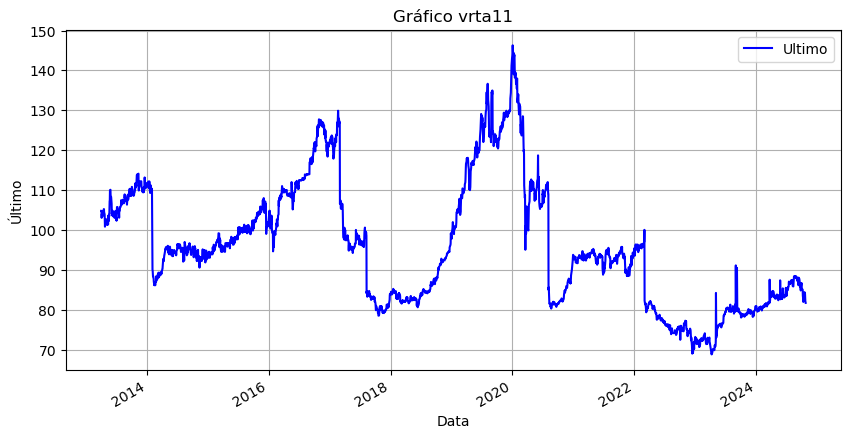

In [325]:
df_vrta['Ultimo'].plot(figsize=(10, 5), color='b', title='Gráfico vrta11') 
plt.xlabel('Data')
plt.ylabel('Último') 
plt.legend() 
plt.grid(True) 
plt.show()  

In [326]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_vrta['valor_padronizado'] = scaler.fit_transform(df_vrta[['Ultimo']])

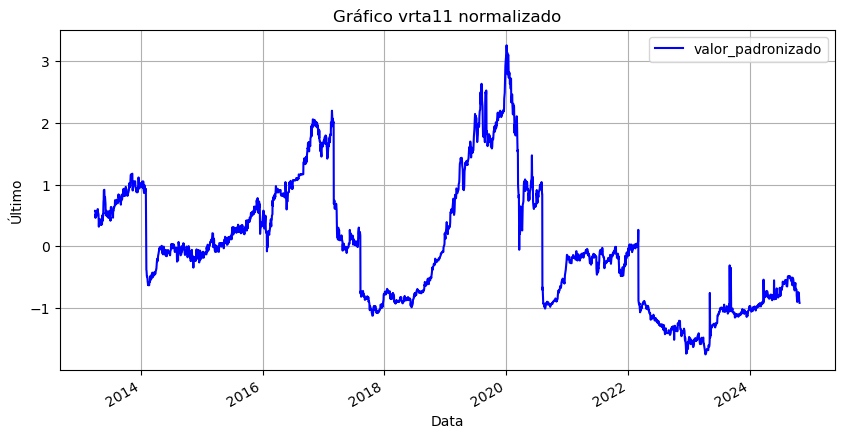

In [327]:
df_vrta['valor_padronizado'].plot(figsize=(10, 5), color='b', title='Gráfico vrta11 normalizado') 
plt.xlabel('Data')
plt.ylabel('Último') 
plt.legend() 
plt.grid(True) 
plt.show()  

In [328]:
df_bova['valor_padronizado'] = scaler.fit_transform(df_bova[['Ultimo']])
df_ifix['valor_padronizado'] = scaler.fit_transform(df_ifix[['Ultimo']])
df_selic['valor_padronizado'] = scaler.fit_transform(df_selic[['selic_meta']])
df_abcp['valor_padronizado'] = scaler.fit_transform(df_abcp[['Ultimo']])
df_bbrc['valor_padronizado'] = scaler.fit_transform(df_bbrc[['Ultimo']])
df_jsre['valor_padronizado'] = scaler.fit_transform(df_jsre[['Ultimo']])
df_kncr['valor_padronizado'] = scaler.fit_transform(df_kncr[['Ultimo']])
df_knri['valor_padronizado'] = scaler.fit_transform(df_knri[['Ultimo']])
df_mxrf['valor_padronizado'] = scaler.fit_transform(df_mxrf[['Ultimo']])
df_rbvo['valor_padronizado'] = scaler.fit_transform(df_rbvo[['Ultimo']])
df_sptw['valor_padronizado'] = scaler.fit_transform(df_sptw[['Ultimo']])

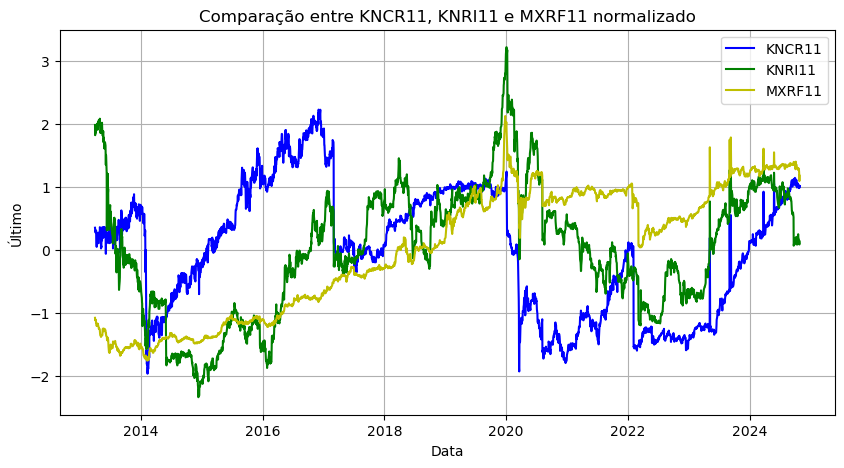

In [329]:
plt.figure(figsize=(10, 5))
plt.plot(df_kncr.index, df_kncr['valor_padronizado'], label='KNCR11', color='b')
plt.plot(df_knri.index, df_knri['valor_padronizado'], label='KNRI11', color='g')
plt.plot(df_mxrf.index, df_mxrf['valor_padronizado'], label='MXRF11', color='y')
plt.title('Comparação entre KNCR11, KNRI11 e MXRF11 normalizado')
plt.xlabel('Data')
plt.ylabel('Último') 
plt.legend() 
plt.grid(True) 
plt.show() 

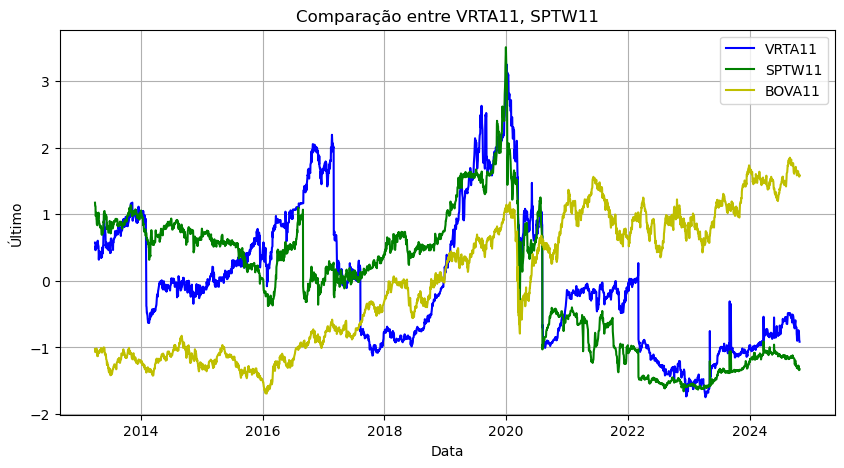

In [330]:
plt.figure(figsize=(10, 5))
plt.plot(df_vrta.index, df_vrta['valor_padronizado'], label='VRTA11', color='b')
plt.plot(df_sptw.index, df_sptw['valor_padronizado'], label='SPTW11', color='g')
plt.plot(df_bova.index, df_bova['valor_padronizado'], label='BOVA11', color='y')
plt.title('Comparação entre VRTA11, SPTW11')
plt.xlabel('Data')
plt.ylabel('Último') 
plt.legend() 
plt.grid(True) 
plt.show() 

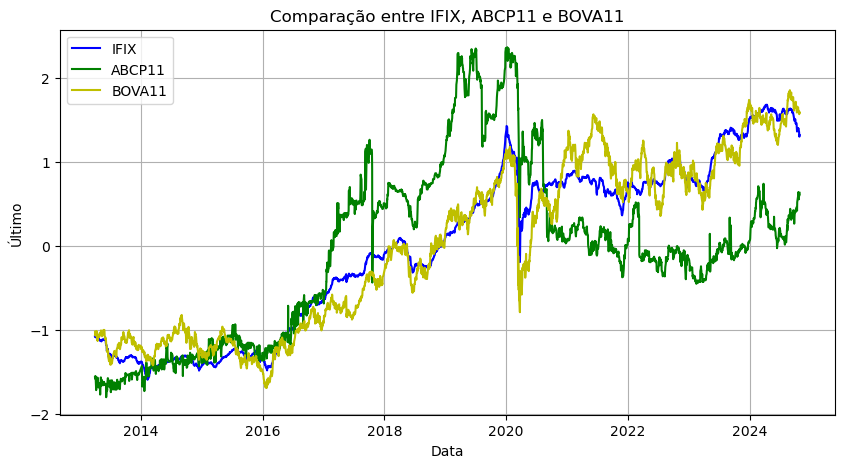

In [331]:
plt.figure(figsize=(10, 5))
plt.plot(df_ifix.index, df_ifix['valor_padronizado'], label='IFIX', color='b')
plt.plot(df_abcp.index, df_abcp['valor_padronizado'], label='ABCP11', color='g')
plt.plot(df_bova.index, df_bova['valor_padronizado'], label='BOVA11', color='y')
plt.title('Comparação entre IFIX, ABCP11 e BOVA11')
plt.xlabel('Data')
plt.ylabel('Último') 
plt.legend() 
plt.grid(True) 
plt.show() 

# Cálculos

## Retorno

In [334]:
# Calculando o retorno diário
df_abcp['Retorno'] = df_abcp['Ultimo'].pct_change()
# Retorno médio
retorno_medio_df_abcp = df_abcp['Retorno'].mean()
print(f'{retorno_medio_df_abcp}')

0.0005745006333172395


In [335]:
# Calculando o retorno diário
df_bbrc['Retorno'] = df_bbrc['Ultimo'].pct_change()
# Retorno médio
retorno_medio_df_bbrc = df_bbrc['Retorno'].mean()
print(f'{retorno_medio_df_bbrc}')

0.00013204322234083716


In [336]:
# Calculando o retorno diário
df_bova['Retorno'] = df_bova['Ultimo'].pct_change()
# Retorno médio
retorno_medio_df_bova = df_bova['Retorno'].mean()
print(f'{retorno_medio_df_bova}')

0.00040896766047615466


In [337]:
# Calculando o retorno diário
df_ifix['Retorno'] = df_ifix['Ultimo'].pct_change()
# Retorno médio
retorno_medio_df_ifix = df_ifix['Retorno'].mean()
print(f'{retorno_medio_df_ifix}')

0.00025765833618873784


In [338]:
# Calculando o retorno diário
df_jsre['Retorno'] = df_jsre['Ultimo'].pct_change()
# Retorno médio
retorno_medio_df_jsre = df_jsre['Retorno'].mean()
print(f'{retorno_medio_df_jsre}')

-0.00012315703957687039


In [339]:
# Calculando o retorno diário
df_kncr['Retorno'] = df_kncr['Ultimo'].pct_change()
# Retorno médio
retorno_medio_df_kncr = df_kncr['Retorno'].mean()
print(f'{retorno_medio_df_kncr}')

0.00010067725618005995


In [340]:
# Calculando o retorno diário
df_knri['Retorno'] = df_knri['Ultimo'].pct_change()
# Retorno médio
retorno_medio_df_knri = df_knri['Retorno'].mean()
print(f'{retorno_medio_df_knri}')

3.7501358027657914e-06


In [341]:
# Calculando o retorno diário
df_mxrf['Retorno'] = df_mxrf['Ultimo'].pct_change()
# Retorno médio
retorno_medio_df_mxrf = df_mxrf['Retorno'].mean()
print(f'{retorno_medio_df_mxrf}')

0.00033597815400631385


In [342]:
# Calculando o retorno diário
df_rbvo['Retorno'] = df_rbvo['Ultimo'].pct_change()
# Retorno médio
retorno_medio_df_rbvo = df_rbvo['Retorno'].mean()
print(f'{retorno_medio_df_rbvo}')

0.00017703186840607081


In [343]:
# Calculando o retorno diário
df_sptw['Retorno'] = df_sptw['Ultimo'].pct_change()
# Retorno médio
retorno_medio_df_sptw = df_sptw['Retorno'].mean()
print(f'{retorno_medio_df_sptw}')

-7.18817556786163e-05


In [344]:
# Calculando o retorno diário
df_vrta['Retorno'] = df_vrta['Ultimo'].pct_change()
# Retorno médio
retorno_medio_df_vrta = df_vrta['Retorno'].mean()
print(f'{retorno_medio_df_vrta}')

6.378970078360299e-06


In [345]:
# Volatilidade com base nos retornos
volatilidade_df_abcp = df_abcp['Retorno'].std()
print(f'{volatilidade_df_abcp}')

0.02311426884881137


In [346]:
# Volatilidade com base nos retornos
volatilidade_df_bbrc = df_bbrc['Retorno'].std()
print(f'{volatilidade_df_bbrc}')

0.015903332999288453


In [347]:
# Volatilidade com base nos retornos
volatilidade_df_bova = df_bova['Retorno'].std()
print(f'{volatilidade_df_bova}')

0.015352831787365061


In [348]:
# Volatilidade com base nos retornos
volatilidade_df_ifix = df_ifix['Retorno'].std()
print(f'{volatilidade_df_ifix}')

0.005080479175565755


In [349]:
# Volatilidade com base nos retornos
volatilidade_df_jsre = df_jsre['Retorno'].std()
print(f'{volatilidade_df_jsre}')

0.014087682140267543


In [350]:
# Volatilidade com base nos retornos
volatilidade_df_kncr = df_kncr['Retorno'].std()
print(f'{volatilidade_df_kncr}')

0.012213880933794077


In [351]:
# Volatilidade com base nos retornos
volatilidade_df_knri = df_knri['Retorno'].std()
print(f'{volatilidade_df_knri}')

0.013032277101128349


In [352]:
# Volatilidade com base nos retornos
volatilidade_df_mxrf = df_mxrf['Retorno'].std()
print(f'{volatilidade_df_mxrf}')

0.012017382733441806


In [353]:
# Volatilidade com base nos retornos
volatilidade_df_rbvo = df_rbvo['Retorno'].std()
print(f'{volatilidade_df_rbvo}')

0.049148285169576346


In [354]:
# Volatilidade com base nos retornos
volatilidade_df_sptw = df_sptw['Retorno'].std()
print(f'{volatilidade_df_sptw}')

0.019164984059586866


In [355]:
# Volatilidade com base nos retornos
volatilidade_df_vrta = df_vrta['Retorno'].std()
print(f'{volatilidade_df_vrta}')

0.013332002212117224


## Média mensal por ano

In [357]:
media_mensal_abcp = df_abcp["Ultimo"].groupby([df_abcp.index.year, df_abcp.index.month]).mean()

media_mensal_abcp.index.names = ["Ano", "Mês"]
print(media_mensal_abcp)

Ano   Mês
2013  4      32.112105
      5      31.708333
      6      31.205000
      7      31.295714
      8      31.231053
               ...    
2024  6      65.542000
      7      65.455217
      8      68.425000
      9      70.722381
      10     73.696842
Name: Ultimo, Length: 139, dtype: float64


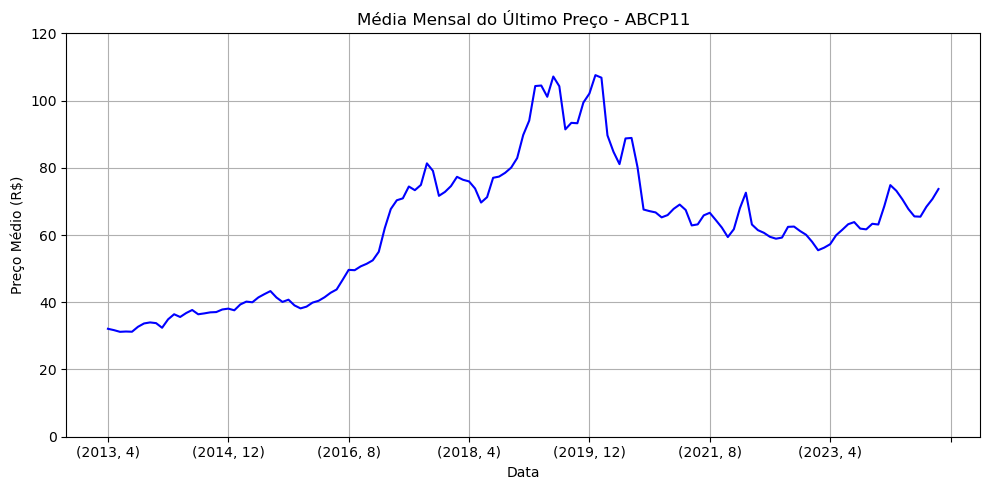

In [358]:
media_mensal_abcp.plot(
    figsize=(10, 5),
    linestyle="-",
    color="blue",
    title="Média Mensal do Último Preço - ABCP11",
    xlabel="Data",
    ylabel="Preço Médio (R$)",
    ylim=(0,120)
)

plt.grid(True)
plt.tight_layout()
plt.show()

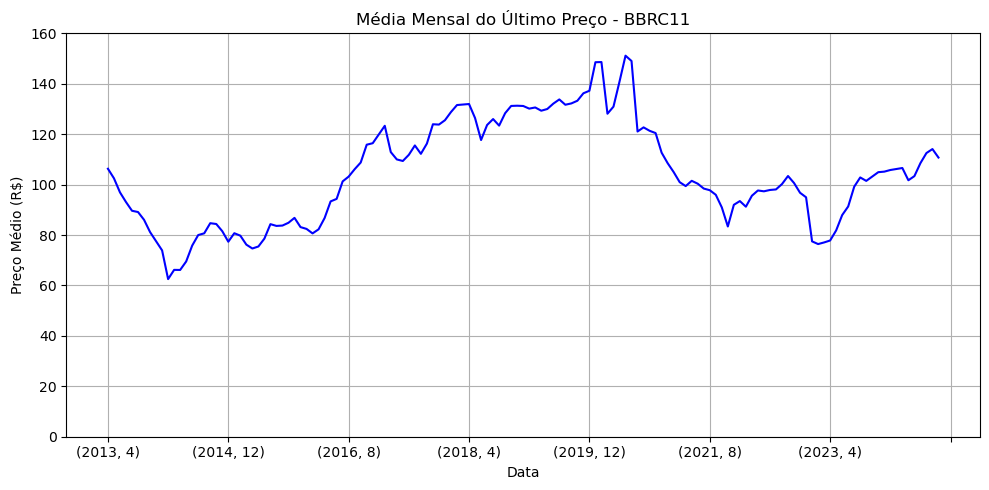

In [359]:
media_mensal_bbrc = df_bbrc["Ultimo"].groupby([df_bbrc.index.year, df_bbrc.index.month]).mean()

media_mensal_bbrc.index.names = ["Ano", "Mês"]

media_mensal_bbrc.plot(
    figsize=(10, 5),
    linestyle="-",
    color="blue",
    title="Média Mensal do Último Preço - BBRC11",
    xlabel="Data",
    ylabel="Preço Médio (R$)",
    ylim=(0,160)
)

plt.grid(True)
plt.tight_layout()
plt.show()

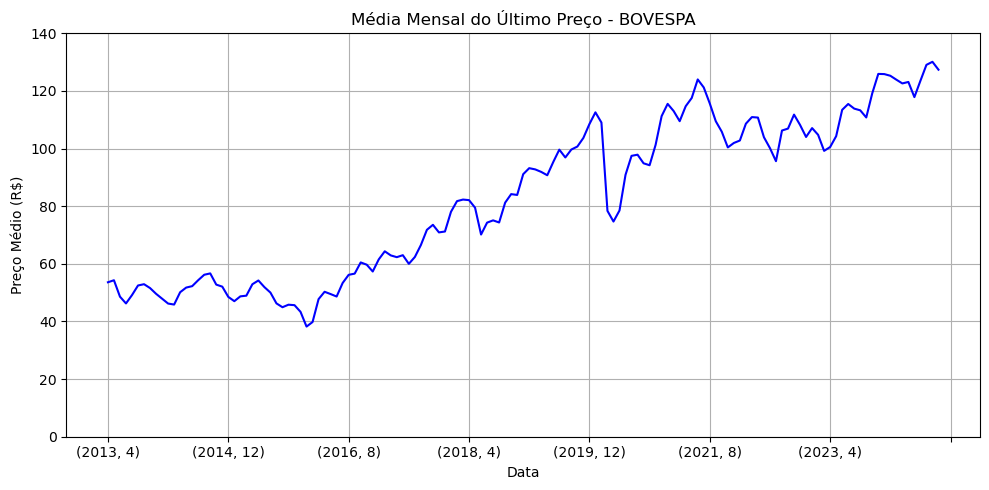

In [360]:
media_mensal_bova = df_bova["Ultimo"].groupby([df_bova.index.year, df_bova.index.month]).mean()

media_mensal_bova.index.names = ["Ano", "Mês"]

media_mensal_bova.plot(
    figsize=(10, 5),
    linestyle="-",
    color="blue",
    title="Média Mensal do Último Preço - BOVESPA",
    xlabel="Data",
    ylabel="Preço Médio (R$)",
    ylim=(0,140)
)

plt.grid(True)
plt.tight_layout()
plt.show()

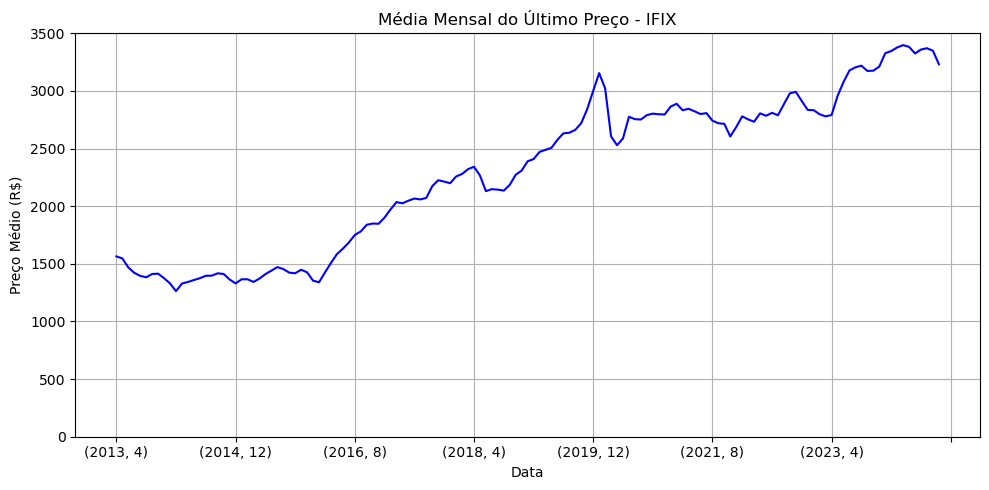

In [361]:
media_mensal_ifix = df_ifix["Ultimo"].groupby([df_ifix.index.year, df_ifix.index.month]).mean()

media_mensal_ifix.index.names = ["Ano", "Mês"]

media_mensal_ifix.plot(
    figsize=(10, 5),
    linestyle="-",
    color="blue",
    title="Média Mensal do Último Preço - IFIX",
    xlabel="Data",
    ylabel="Preço Médio (R$)",
    ylim=(0,3500)
)

plt.grid(True)
plt.tight_layout()
plt.show()

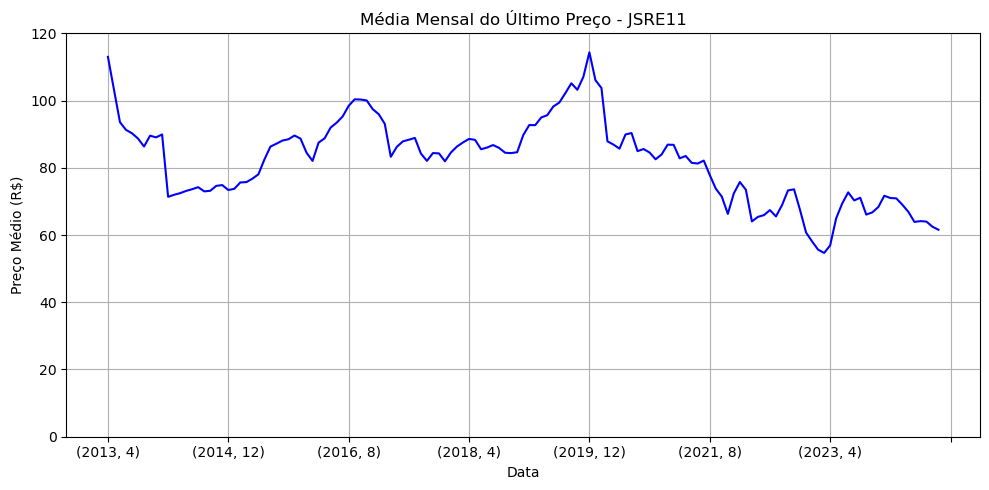

In [362]:
media_mensal_jsre = df_jsre["Ultimo"].groupby([df_jsre.index.year, df_jsre.index.month]).mean()

media_mensal_jsre.index.names = ["Ano", "Mês"]

media_mensal_jsre.plot(
    figsize=(10, 5),
    linestyle="-",
    color="blue",
    title="Média Mensal do Último Preço - JSRE11",
    xlabel="Data",
    ylabel="Preço Médio (R$)",
    ylim=(0,120)
)

plt.grid(True)
plt.tight_layout()
plt.show()

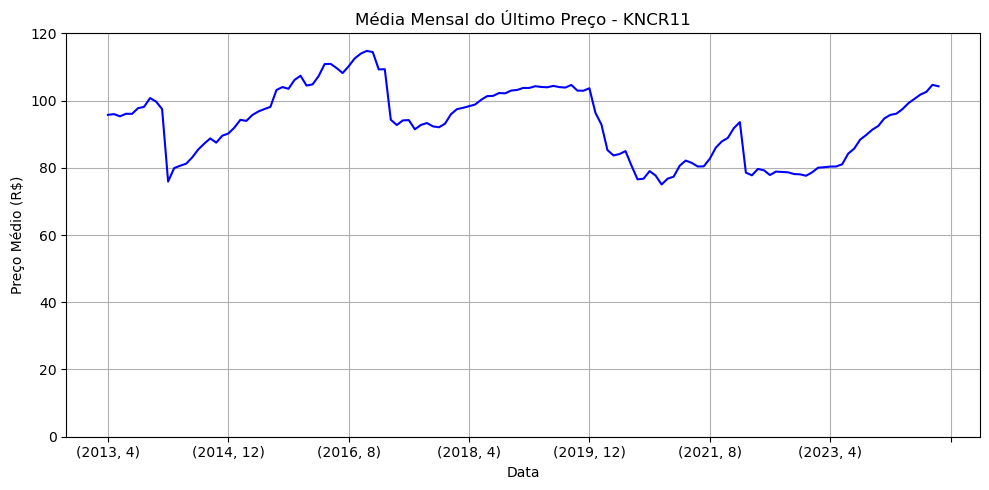

In [363]:
media_mensal_kncr = df_kncr["Ultimo"].groupby([df_kncr.index.year, df_kncr.index.month]).mean()

media_mensal_kncr.index.names = ["Ano", "Mês"]

media_mensal_kncr.plot(
    figsize=(10, 5),
    linestyle="-",
    color="blue",
    title="Média Mensal do Último Preço - KNCR11",
    xlabel="Data",
    ylabel="Preço Médio (R$)",
    ylim=(0,120)
)

plt.grid(True)
plt.tight_layout()
plt.show()

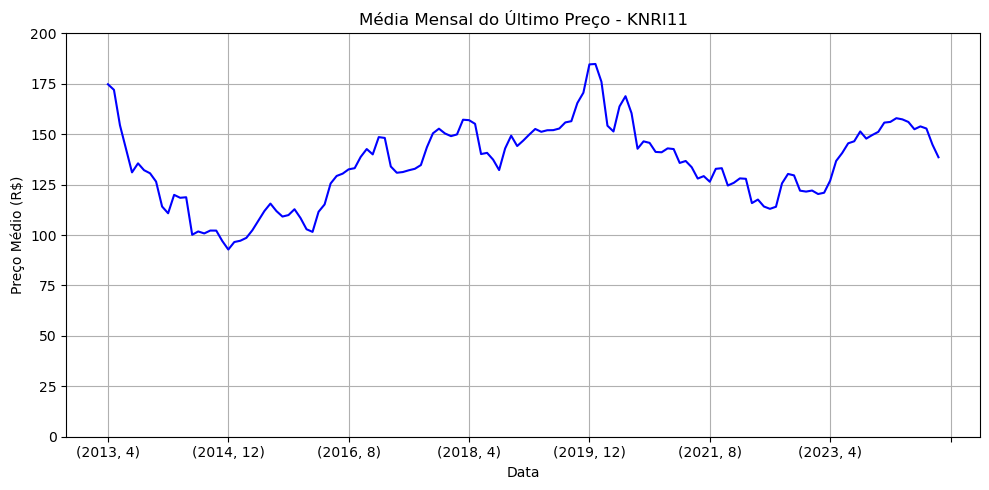

In [364]:
media_mensal_knri = df_knri["Ultimo"].groupby([df_knri.index.year, df_knri.index.month]).mean()

media_mensal_knri.index.names = ["Ano", "Mês"]

media_mensal_knri.plot(
    figsize=(10, 5),
    linestyle="-",
    color="blue",
    title="Média Mensal do Último Preço - KNRI11",
    xlabel="Data",
    ylabel="Preço Médio (R$)",
    ylim=(0,200)
)

plt.grid(True)
plt.tight_layout()
plt.show()

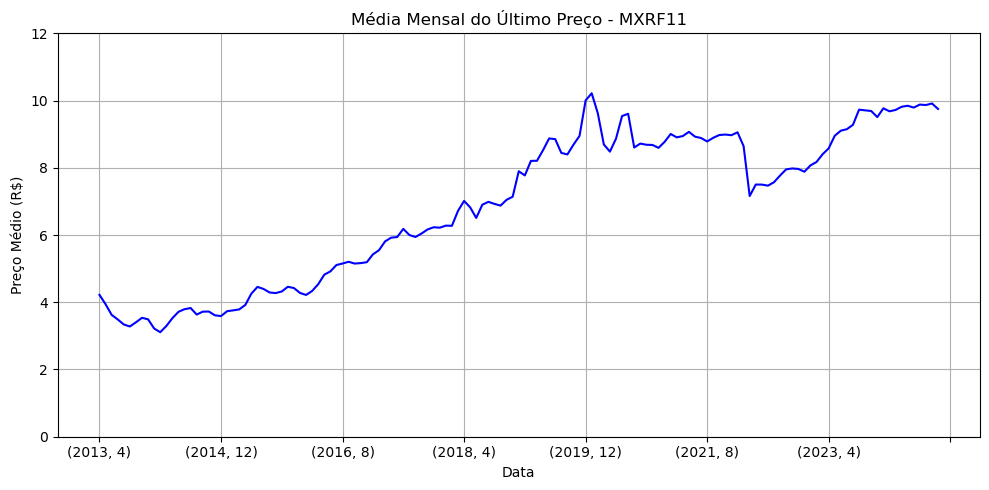

In [365]:
media_mensal_mxrf = df_mxrf["Ultimo"].groupby([df_mxrf.index.year, df_mxrf.index.month]).mean()

media_mensal_mxrf.index.names = ["Ano", "Mês"]

media_mensal_mxrf.plot(
    figsize=(10, 5),
    linestyle="-",
    color="blue",
    title="Média Mensal do Último Preço - MXRF11",
    xlabel="Data",
    ylabel="Preço Médio (R$)",
    ylim=(0,12)
)

plt.grid(True)
plt.tight_layout()
plt.show()

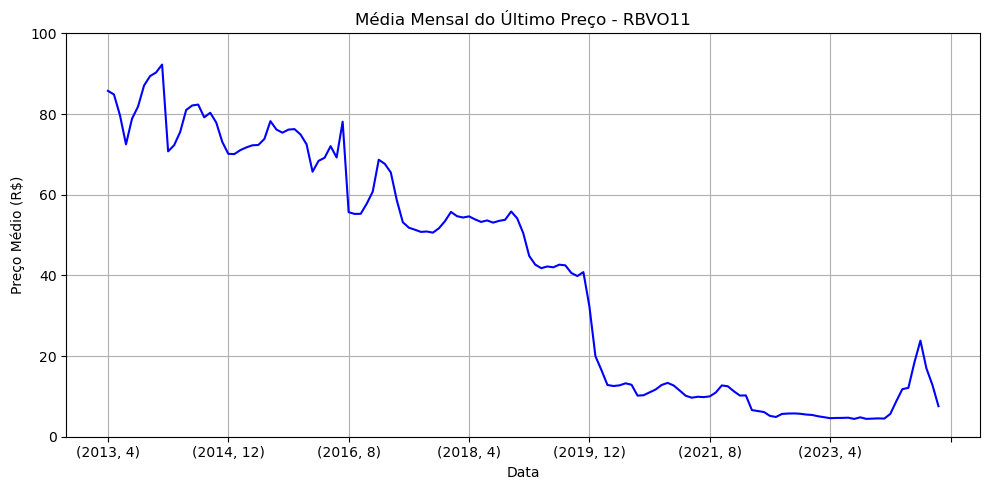

In [366]:
media_mensal_rbvo = df_rbvo["Ultimo"].groupby([df_rbvo.index.year, df_rbvo.index.month]).mean()

media_mensal_rbvo.index.names = ["Ano", "Mês"]

media_mensal_rbvo.plot(
    figsize=(10, 5),
    linestyle="-",
    color="blue",
    title="Média Mensal do Último Preço - RBVO11",
    xlabel="Data",
    ylabel="Preço Médio (R$)",
    ylim=(0,100)
)

plt.grid(True)
plt.tight_layout()
plt.show()

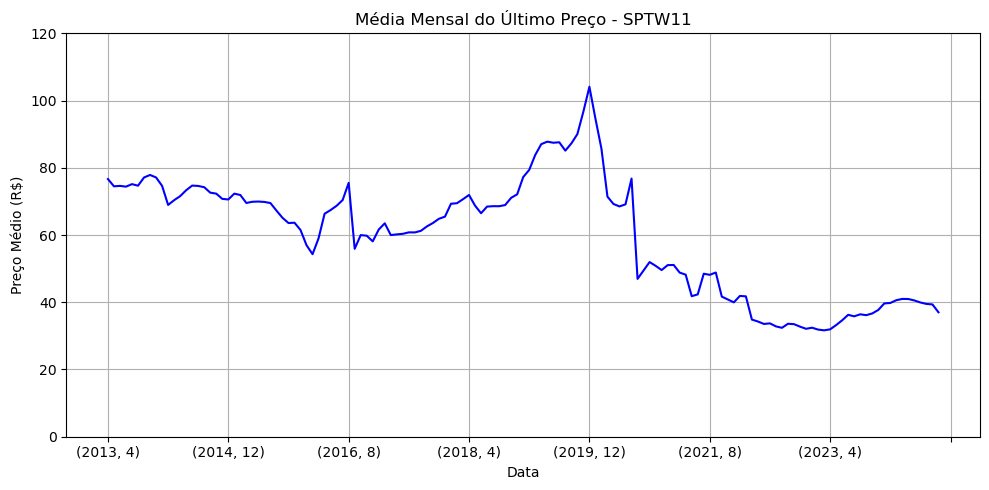

In [367]:
media_mensal_sptw = df_sptw["Ultimo"].groupby([df_sptw.index.year, df_sptw.index.month]).mean()

media_mensal_sptw.index.names = ["Ano", "Mês"]

media_mensal_sptw.plot(
    figsize=(10, 5),
    linestyle="-",
    color="blue",
    title="Média Mensal do Último Preço - SPTW11",
    xlabel="Data",
    ylabel="Preço Médio (R$)",
    ylim=(0,120)
)

plt.grid(True)
plt.tight_layout()
plt.show()

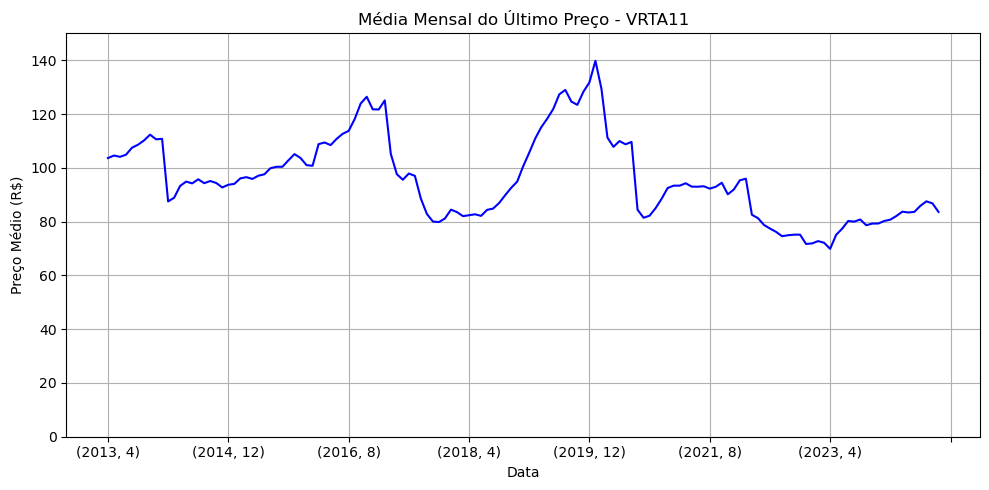

In [368]:
media_mensal_vrta = df_vrta["Ultimo"].groupby([df_vrta.index.year, df_vrta.index.month]).mean()

media_mensal_vrta.index.names = ["Ano", "Mês"]

media_mensal_vrta.plot(
    figsize=(10, 5),
    linestyle="-",
    color="blue",
    title="Média Mensal do Último Preço - VRTA11",
    xlabel="Data",
    ylabel="Preço Médio (R$)",
    ylim=(0,150)
)

plt.grid(True)
plt.tight_layout()
plt.show()

## Volatilidade

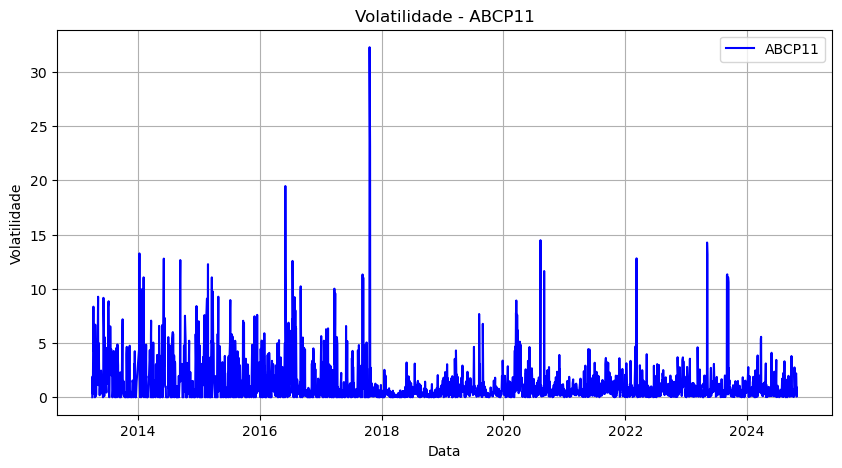

In [370]:
df_abcp["Volatilidade"] = df_abcp["Ultimo"].pct_change().abs() * 100
df_abcp.fillna({"Volatilidade": 0}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df_abcp.index, df_abcp["Volatilidade"], label="ABCP11", color="b")
plt.title("Volatilidade - ABCP11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

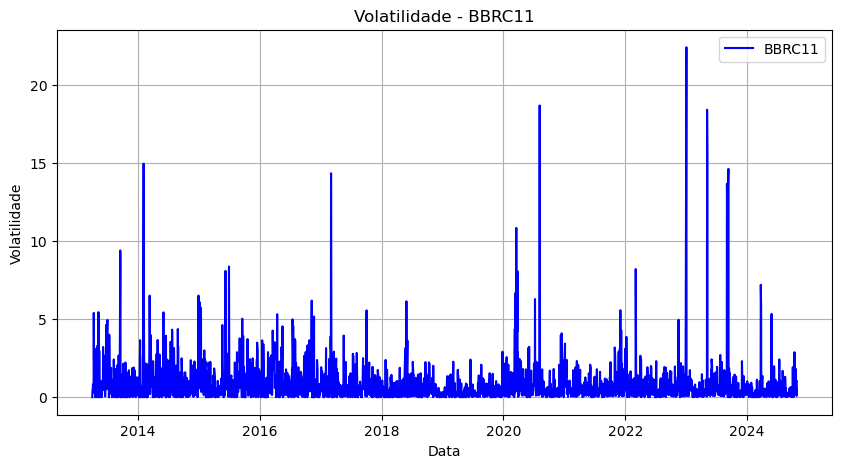

In [371]:
df_bbrc["Volatilidade"] = df_bbrc["Ultimo"].pct_change().abs() * 100
df_bbrc.fillna({"Volatilidade": 0}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df_bbrc.index, df_bbrc["Volatilidade"], label="BBRC11", color="b")
plt.title("Volatilidade - BBRC11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

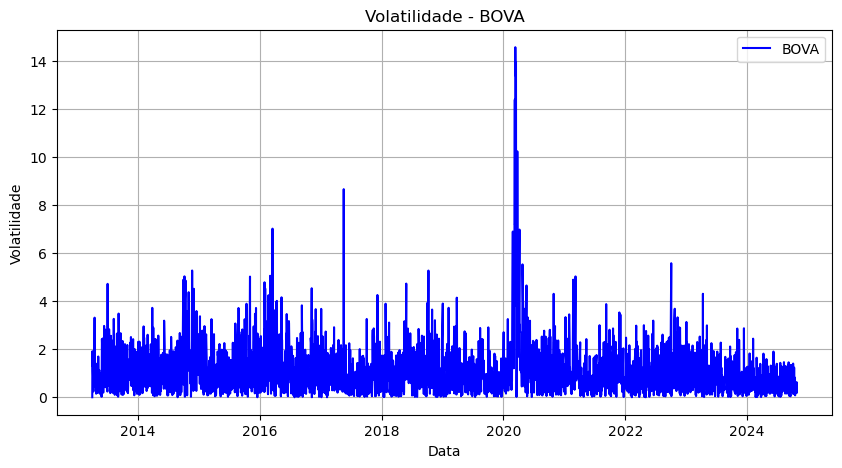

In [372]:
df_bova["Volatilidade"] = df_bova["Ultimo"].pct_change().abs() * 100
df_bova.fillna({"Volatilidade": 0}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df_bova.index, df_bova["Volatilidade"], label="BOVA", color="b")
plt.title("Volatilidade - BOVA")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

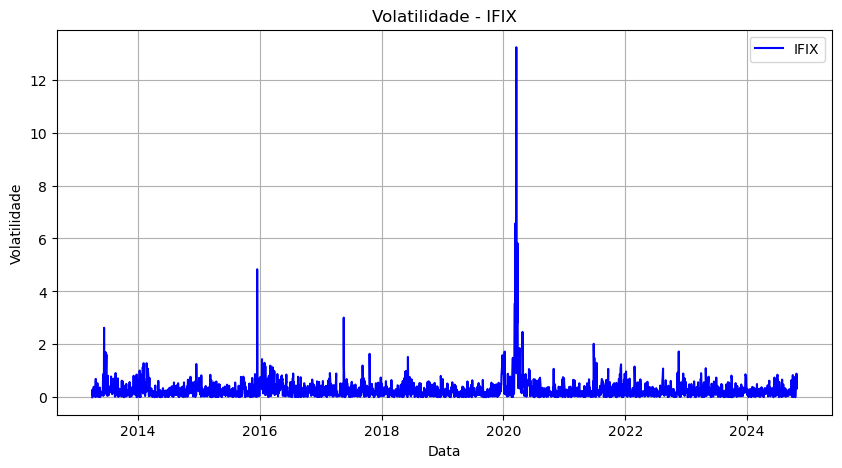

In [373]:
df_ifix["Volatilidade"] = df_ifix["Ultimo"].pct_change().abs() * 100
df_ifix.fillna({"Volatilidade": 0}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df_ifix.index, df_ifix["Volatilidade"], label="IFIX", color="b")
plt.title("Volatilidade - IFIX")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

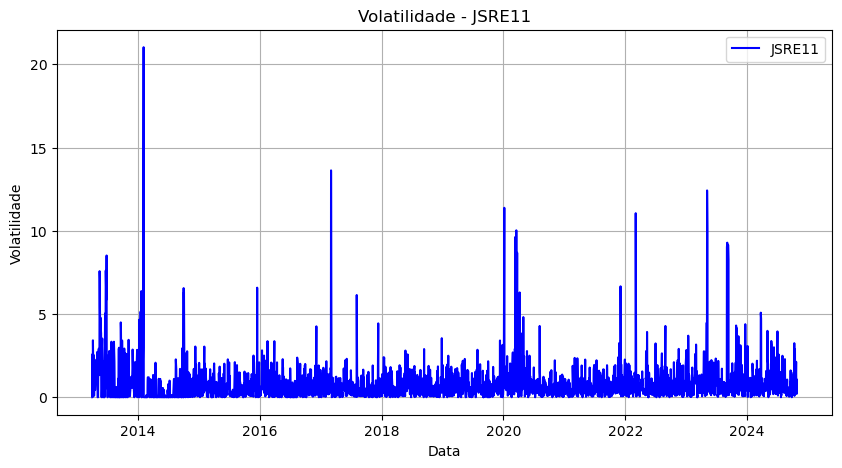

In [374]:
df_jsre["Volatilidade"] = df_jsre["Ultimo"].pct_change().abs() * 100
df_jsre.fillna({"Volatilidade": 0}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df_jsre.index, df_jsre["Volatilidade"], label="JSRE11", color="b")
plt.title("Volatilidade - JSRE11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

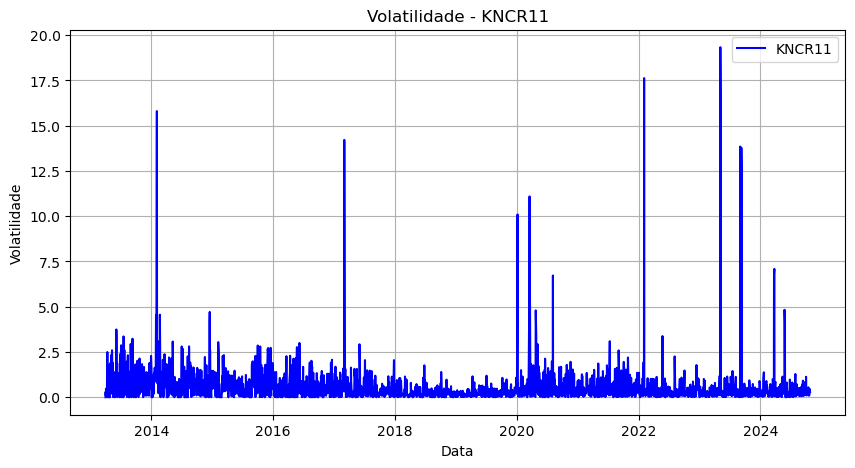

In [375]:
df_kncr["Volatilidade"] = df_kncr["Ultimo"].pct_change().abs() * 100
df_kncr.fillna({"Volatilidade": 0}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df_kncr.index, df_kncr["Volatilidade"], label="KNCR11", color="b")
plt.title("Volatilidade - KNCR11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

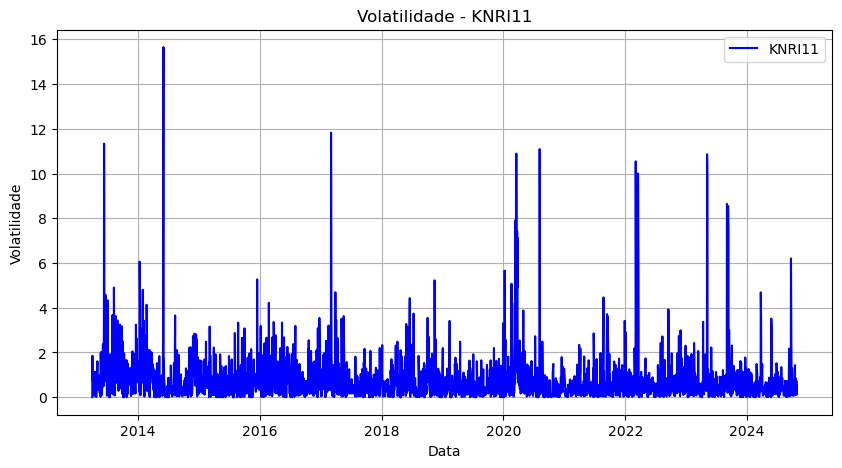

In [376]:
df_knri["Volatilidade"] = df_knri["Ultimo"].pct_change().abs() * 100
df_knri.fillna({"Volatilidade": 0}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df_knri.index, df_knri["Volatilidade"], label="KNRI11", color="b")
plt.title("Volatilidade - KNRI11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

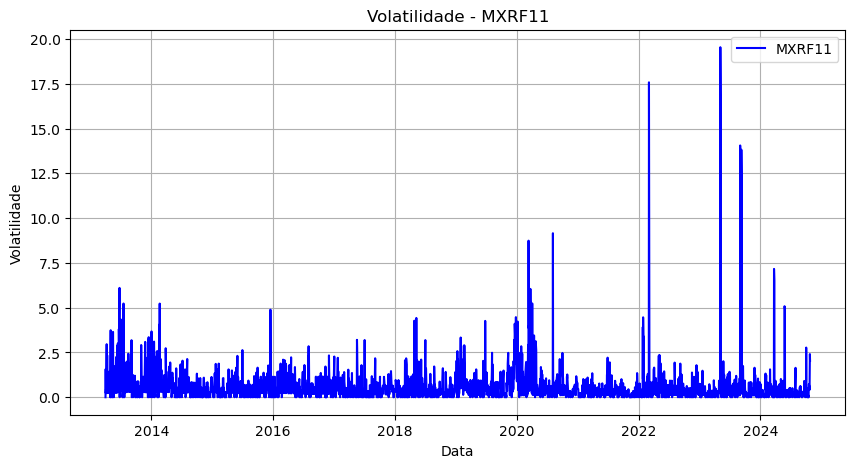

In [377]:
df_mxrf["Volatilidade"] = df_mxrf["Ultimo"].pct_change().abs() * 100
df_mxrf.fillna({"Volatilidade": 0}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df_mxrf.index, df_mxrf["Volatilidade"], label="MXRF11", color="b")
plt.title("Volatilidade - MXRF11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

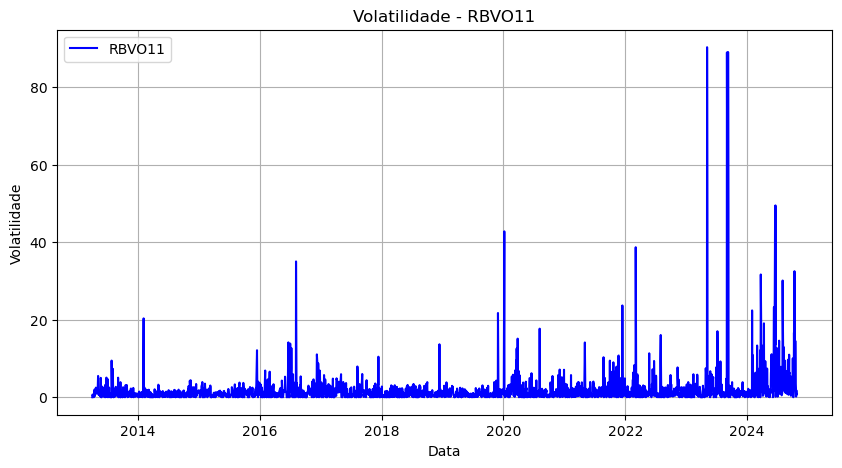

In [378]:
df_rbvo["Volatilidade"] = df_rbvo["Ultimo"].pct_change().abs() * 100
df_rbvo.fillna({"Volatilidade": 0}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df_rbvo.index, df_rbvo["Volatilidade"], label="RBVO11", color="b")
plt.title("Volatilidade - RBVO11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

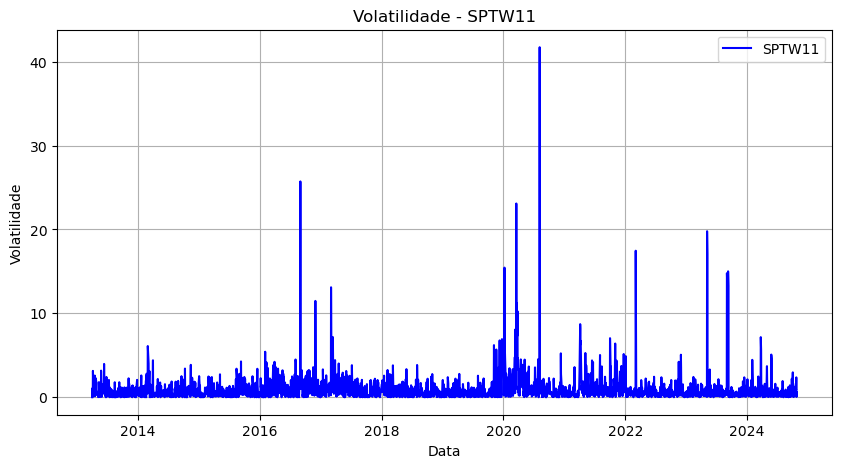

In [379]:
df_sptw["Volatilidade"] = df_sptw["Ultimo"].pct_change().abs() * 100
df_sptw.fillna({"Volatilidade": 0}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df_sptw.index, df_sptw["Volatilidade"], label="SPTW11", color="b")
plt.title("Volatilidade - SPTW11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

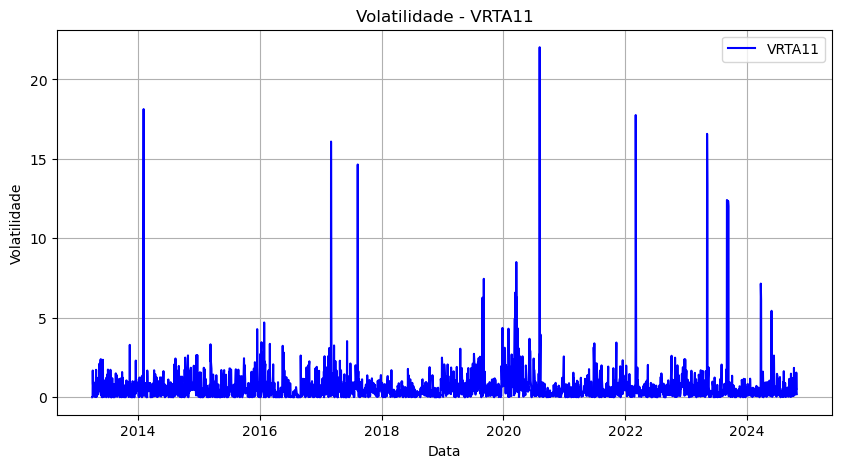

In [380]:
df_vrta["Volatilidade"] = df_vrta["Ultimo"].pct_change().abs() * 100
df_vrta.fillna({"Volatilidade": 0}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df_vrta.index, df_vrta["Volatilidade"], label="VRTA11", color="b")
plt.title("Volatilidade - VRTA11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

## Volatilidade intra-diária: Mede a diferença percentual entre a máxima e a mínima no mesmo dia

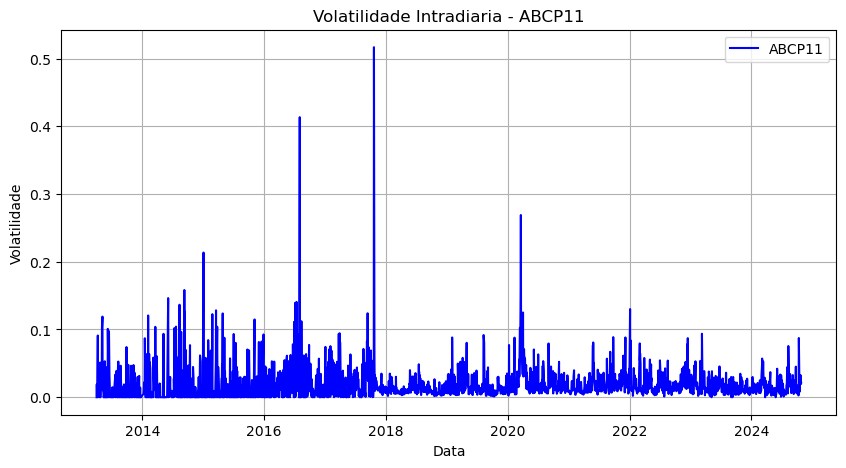

In [382]:
df_abcp["Volatilidade_Intradiaria"] = (df_abcp["Max"] - df_abcp["Min"]) / df_abcp["Min"]

plt.figure(figsize=(10, 5))
plt.plot(df_abcp.index, df_abcp["Volatilidade_Intradiaria"], label="ABCP11", color="b")
plt.title("Volatilidade Intradiaria - ABCP11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

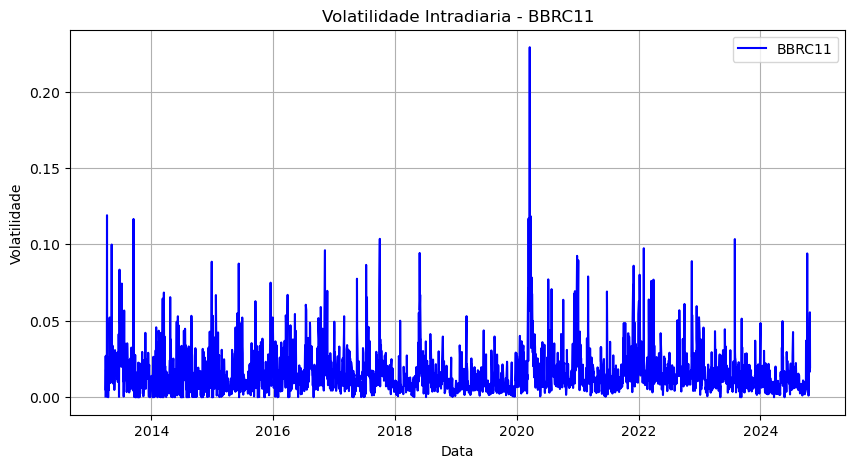

In [383]:
df_bbrc["Volatilidade_Intradiaria"] = (df_bbrc["Max"] - df_bbrc["Min"]) / df_bbrc["Min"]

plt.figure(figsize=(10, 5))
plt.plot(df_bbrc.index, df_bbrc["Volatilidade_Intradiaria"], label="BBRC11", color="b")
plt.title("Volatilidade Intradiaria - BBRC11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

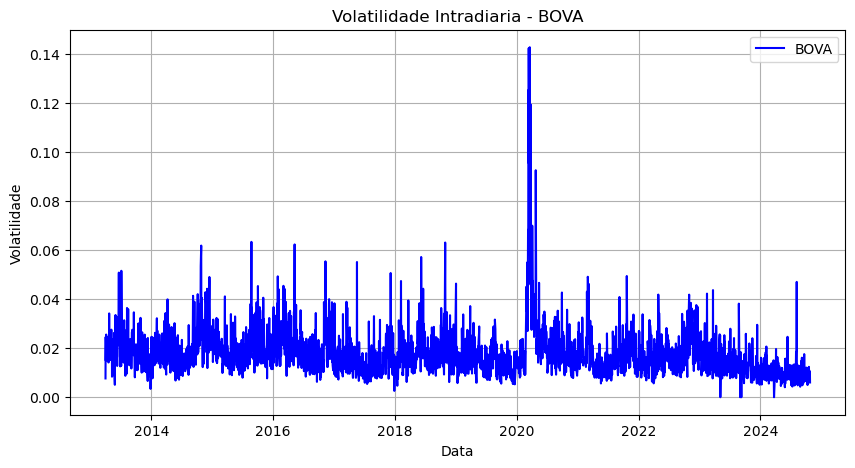

In [384]:
df_bova["Volatilidade_Intradiaria"] = (df_bova["Max"] - df_bova["Min"]) / df_bova["Min"]

plt.figure(figsize=(10, 5))
plt.plot(df_bova.index, df_bova["Volatilidade_Intradiaria"], label="BOVA", color="b")
plt.title("Volatilidade Intradiaria - BOVA")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

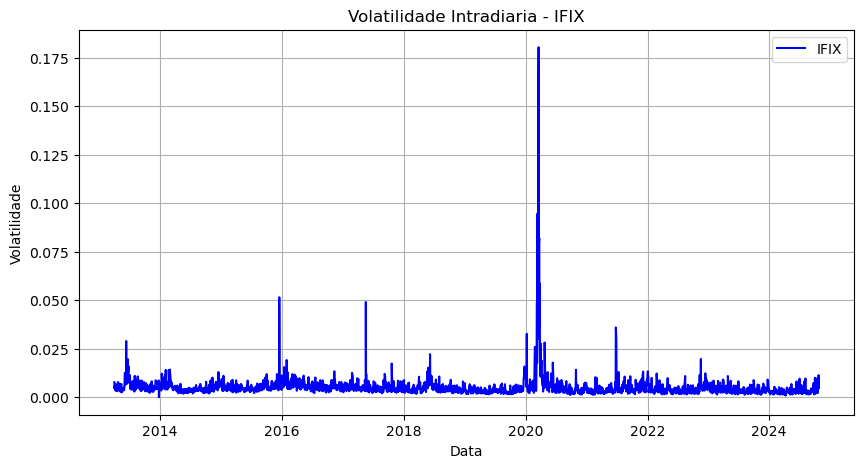

In [385]:
df_ifix["Volatilidade_Intradiaria"] = (df_ifix["Max"] - df_ifix["Min"]) / df_ifix["Min"]

plt.figure(figsize=(10, 5))
plt.plot(df_ifix.index, df_ifix["Volatilidade_Intradiaria"], label="IFIX", color="b")
plt.title("Volatilidade Intradiaria - IFIX")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

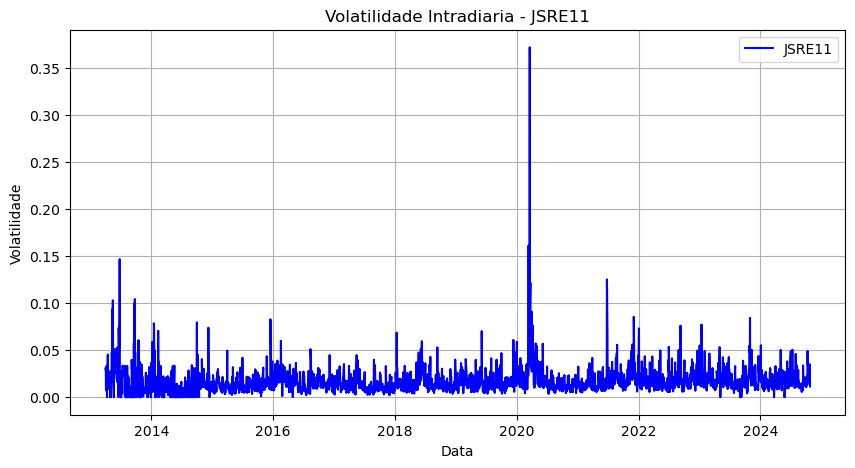

In [386]:
df_jsre["Volatilidade_Intradiaria"] = (df_jsre["Max"] - df_jsre["Min"]) / df_jsre["Min"]

plt.figure(figsize=(10, 5))
plt.plot(df_jsre.index, df_jsre["Volatilidade_Intradiaria"], label="JSRE11", color="b")
plt.title("Volatilidade Intradiaria - JSRE11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

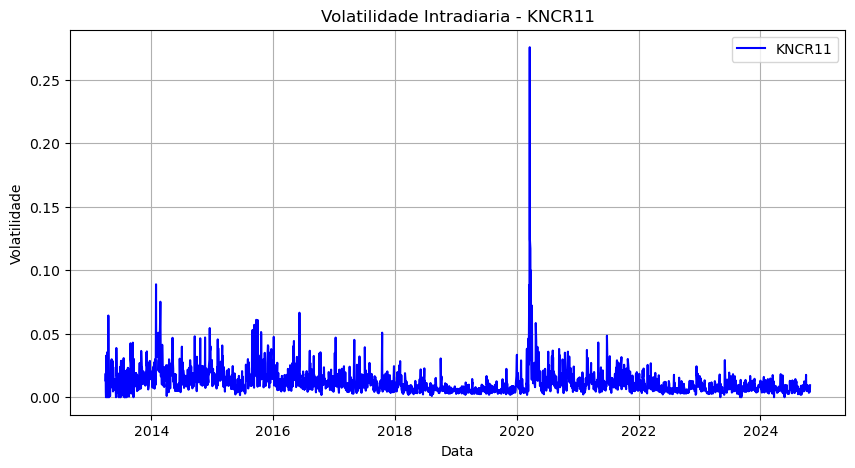

In [387]:
df_kncr["Volatilidade_Intradiaria"] = (df_kncr["Max"] - df_kncr["Min"]) / df_kncr["Min"]

plt.figure(figsize=(10, 5))
plt.plot(df_kncr.index, df_kncr["Volatilidade_Intradiaria"], label="KNCR11", color="b")
plt.title("Volatilidade Intradiaria - KNCR11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

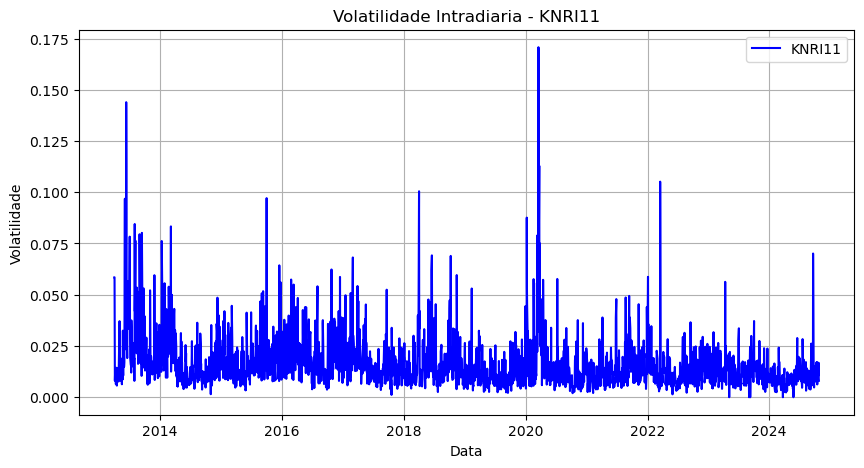

In [388]:
df_knri["Volatilidade_Intradiaria"] = (df_knri["Max"] - df_knri["Min"]) / df_knri["Min"]

plt.figure(figsize=(10, 5))
plt.plot(df_knri.index, df_knri["Volatilidade_Intradiaria"], label="KNRI11", color="b")
plt.title("Volatilidade Intradiaria - KNRI11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

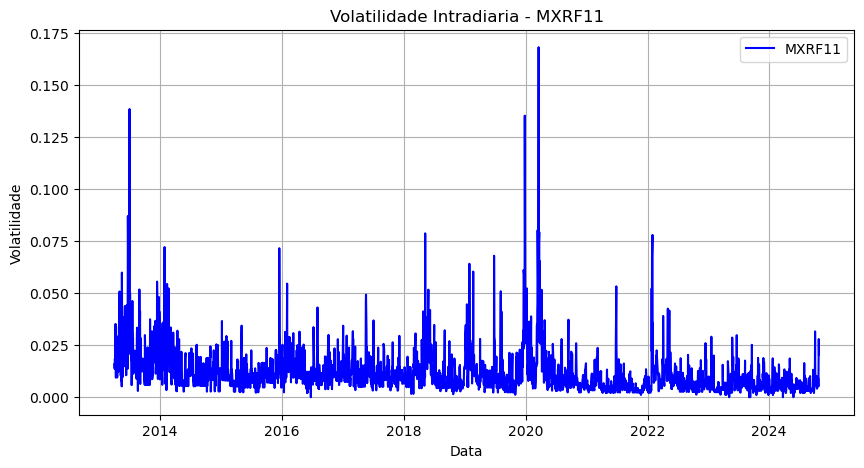

In [389]:
df_mxrf["Volatilidade_Intradiaria"] = (df_mxrf["Max"] - df_mxrf["Min"]) / df_mxrf["Min"]

plt.figure(figsize=(10, 5))
plt.plot(df_mxrf.index, df_mxrf["Volatilidade_Intradiaria"], label="MXRF11", color="b")
plt.title("Volatilidade Intradiaria - MXRF11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

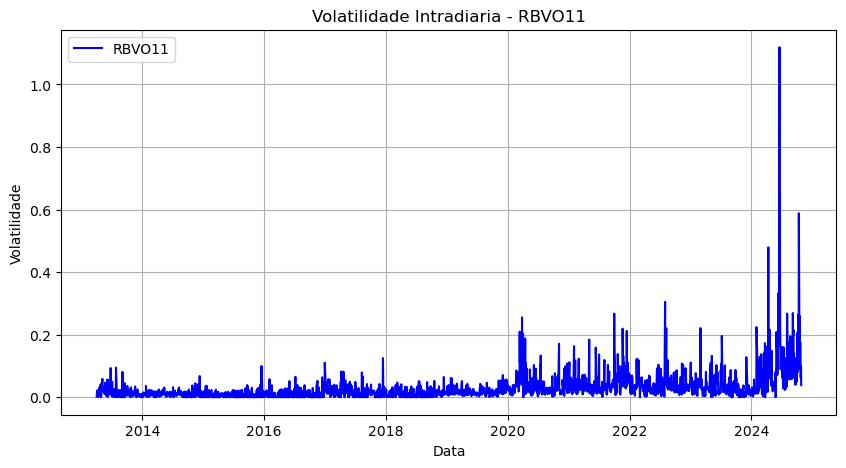

In [390]:
df_rbvo["Volatilidade_Intradiaria"] = (df_rbvo["Max"] - df_rbvo["Min"]) / df_rbvo["Min"]

plt.figure(figsize=(10, 5))
plt.plot(df_rbvo.index, df_rbvo["Volatilidade_Intradiaria"], label="RBVO11", color="b")
plt.title("Volatilidade Intradiaria - RBVO11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

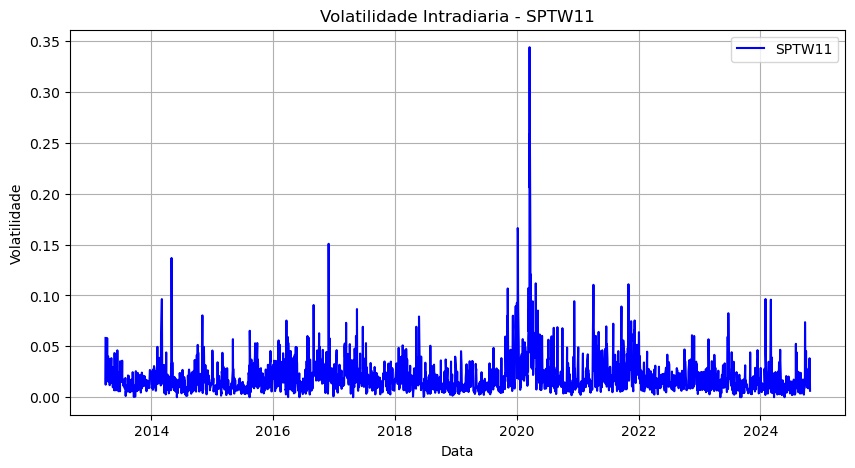

In [391]:
df_sptw["Volatilidade_Intradiaria"] = (df_sptw["Max"] - df_sptw["Min"]) / df_sptw["Min"]

plt.figure(figsize=(10, 5))
plt.plot(df_sptw.index, df_sptw["Volatilidade_Intradiaria"], label="SPTW11", color="b")
plt.title("Volatilidade Intradiaria - SPTW11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

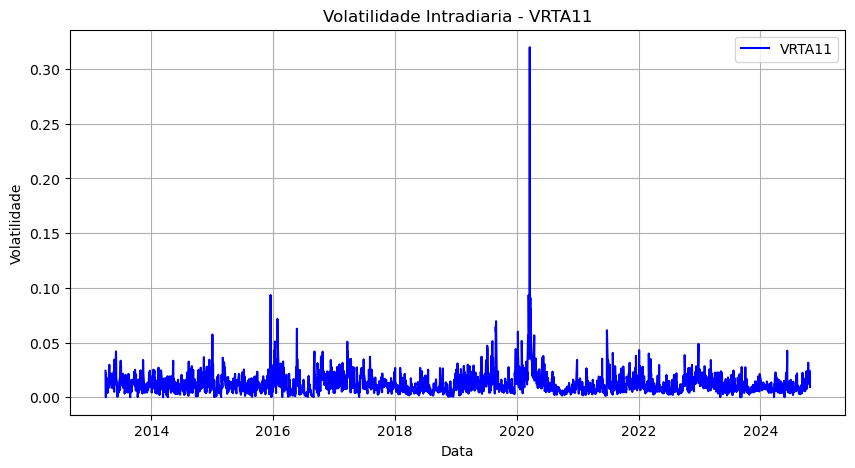

In [392]:
df_vrta["Volatilidade_Intradiaria"] = (df_vrta["Max"] - df_vrta["Min"]) / df_vrta["Min"]

plt.figure(figsize=(10, 5))
plt.plot(df_vrta.index, df_vrta["Volatilidade_Intradiaria"], label="VRTA11", color="b")
plt.title("Volatilidade Intradiaria - VRTA11")
plt.xlabel("Data")
plt.ylabel("Volatilidade") 
plt.legend() 
plt.grid(True) 
plt.show() 

## Decomposição

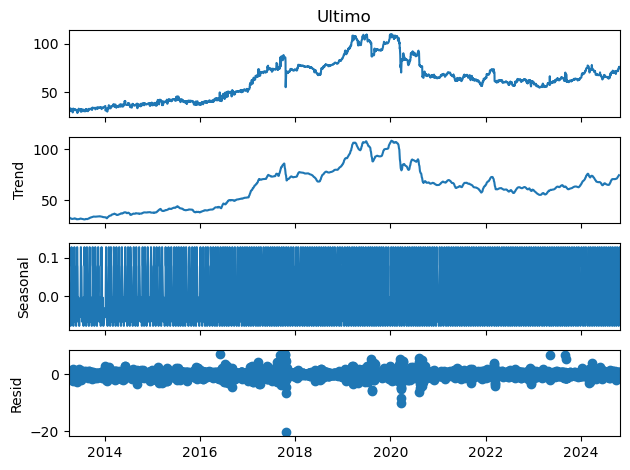

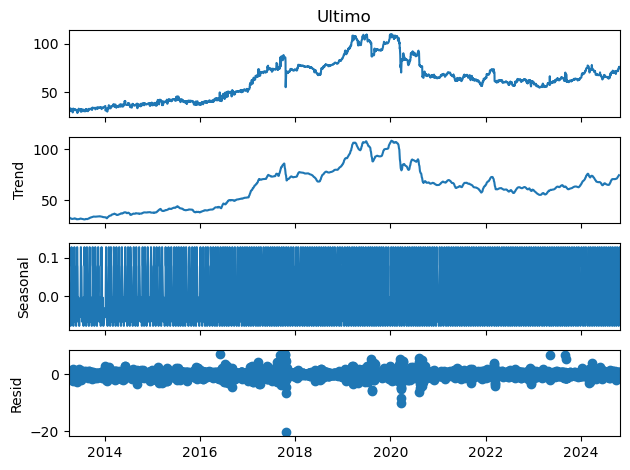

In [394]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_abcp['Ultimo'], model='additive', period=12)

# Visualizando os componentes
result.plot()

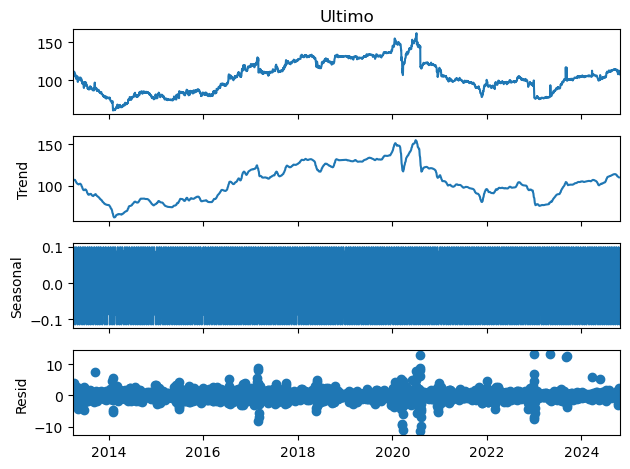

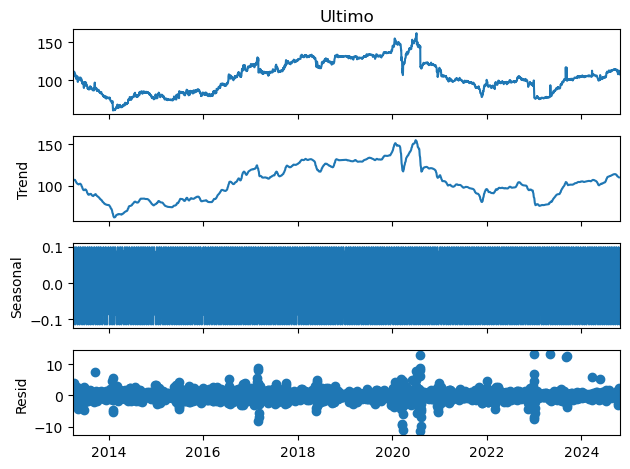

In [395]:
result = seasonal_decompose(df_bbrc['Ultimo'], model='additive', period=12)

result.plot()

## Assimetria e curtose

In [397]:
from scipy.stats import skew, kurtosis
#Curtose (Kurtosis): Mede a "pontiagudez" da distribuição.
#
#Curtose alta: Distribuição com caudas mais pesadas (leptocúrtica).
#Curtose baixa: Distribuição com caudas mais leves (platicúrtica).
#Curtose próxima de 3: Distribuição normal (mesocúrtica).
###
#Assimetria (Skewness): Mede a simetria da distribuição.
#
#Assimetria positiva: A cauda direita é mais longa (distribuição enviesada para a direita).
#Assimetria negativa: A cauda esquerda é mais longa (distribuição enviesada para a esquerda).

assimetria = skew(df_bbrc["Ultimo"])
curtose = kurtosis(df_bbrc["Ultimo"])

print(f"Assimetria (Skewness): {assimetria:.2f}")
print(f"Curtose (Kurtosis): {curtose:.2f}")

Assimetria (Skewness): 0.23
Curtose (Kurtosis): -0.77


In [398]:
# Calcular assimetria e curtose por ano
metrics = df_bbrc.groupby(df_bbrc.index.year)["Ultimo"].agg([
    ("Assimetria", lambda x: skew(x)),
    ("Curtose", lambda x: kurtosis(x))
])

print(metrics)

      Assimetria   Curtose
Data                      
2013    0.176473 -0.944914
2014   -0.357024 -1.177243
2015   -0.177354 -1.236354
2016    0.074054 -1.243204
2017    0.253393 -1.365961
2018   -0.828622 -0.418453
2019    0.681093 -0.149449
2020    0.042182 -1.422590
2021   -0.704061  1.004588
2022    0.001141 -0.227266
2023    0.075783 -1.542965
2024    0.266561 -1.034283


## a

In [400]:
df_ifix["Retorno"] = df_ifix["Ultimo"].pct_change()
# Calcular o desempenho relativo
df_bbrc["Desempenho_relativo_ifix"] = df_bbrc["Retorno"] - df_ifix["Retorno"]
# Calcular o desempenho acumulado
df_bbrc["Desempenho_relativo_acumulado_ifix"] = (1 + df_bbrc["Desempenho_relativo_ifix"]).cumprod() - 1

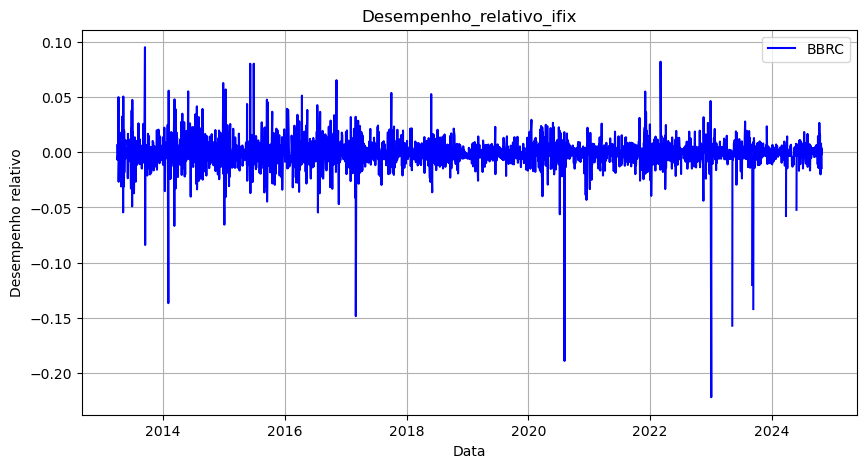

In [401]:
plt.figure(figsize=(10, 5))
plt.plot(df_bbrc.index, df_bbrc['Desempenho_relativo_ifix'], label='BBRC', color='b')
plt.title('Desempenho_relativo_ifix')
plt.xlabel('Data')
plt.ylabel('Desempenho relativo') 
plt.legend() 
plt.grid(True) 
plt.show() 

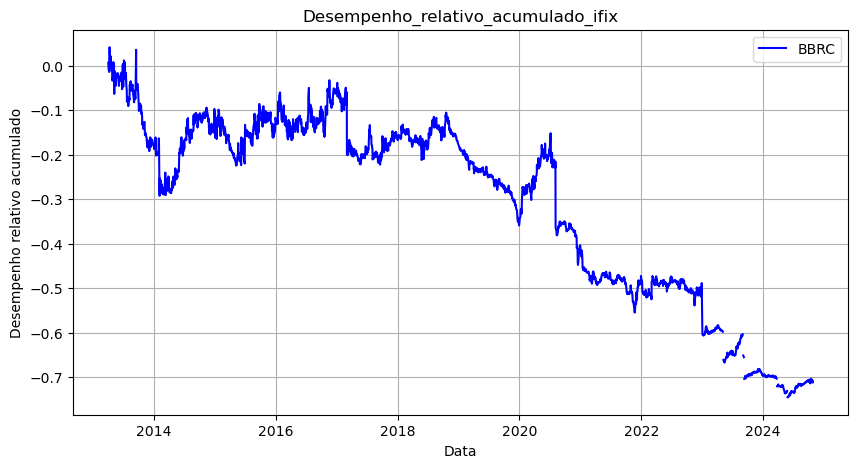

In [402]:
plt.figure(figsize=(10, 5))
plt.plot(df_bbrc.index, df_bbrc['Desempenho_relativo_acumulado_ifix'], label='BBRC', color='b')
plt.title('Desempenho_relativo_acumulado_ifix')
plt.xlabel('Data')
plt.ylabel('Desempenho relativo acumulado') 
plt.legend() 
plt.grid(True) 
plt.show() 

In [403]:
# Preço pré-COVID (final de fevereiro de 2020)
pre_covid_price = df_bbrc.loc["2020-02-28", "Ultimo"]

# Preço no pico da crise (março de 2020)
pico_crise_price =df_bbrc.loc["2020-03-20", "Ultimo"]

preco_recente = df_bbrc["Ultimo"].iloc[-1]

recuperado = preco_recente >= pre_covid_price
print(f"FII recuperado? {recuperado}")

# Calcular variação percentual
variacao = ((preco_recente - pre_covid_price) / pre_covid_price) * 100
print(f"Variação percentual desde o pré-COVID: {variacao:.2f}%")

FII recuperado? False
Variação percentual desde o pré-COVID: -26.93%


In [404]:
# Preço pré-COVID (final de fevereiro de 2020)
pre_covid_price = df_kncr.loc["2020-02-28", "Ultimo"]

# Preço no pico da crise (março de 2020)
pico_crise_price =df_kncr.loc["2020-03-20", "Ultimo"]

preco_recente = df_kncr["Ultimo"].iloc[-1]

recuperado = preco_recente >= pre_covid_price
print(f"FII recuperado? {recuperado}")

# Calcular variação percentual
variacao = ((preco_recente - pre_covid_price) / pre_covid_price) * 100
print(f"Variação percentual desde o pré-COVID: {variacao:.2f}%")

FII recuperado? True
Variação percentual desde o pré-COVID: 11.33%


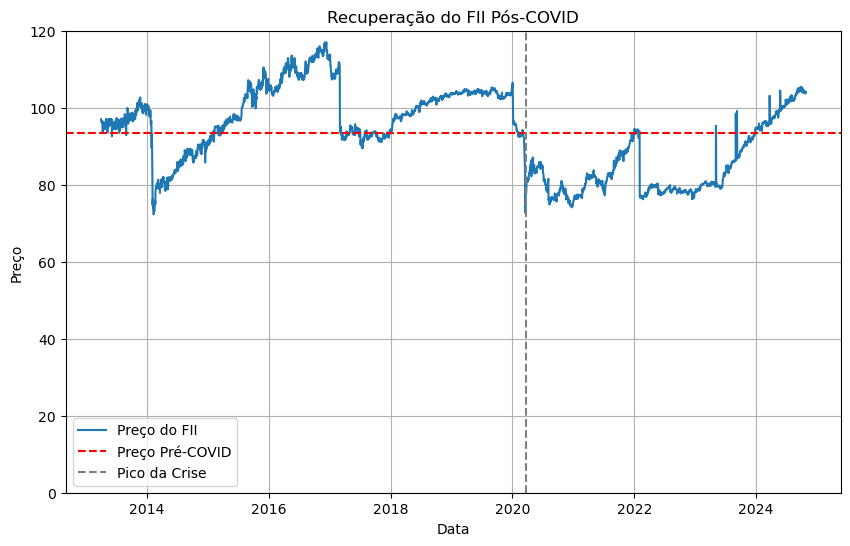

In [405]:
plt.figure(figsize=(10, 6))
plt.plot(df_kncr.index, df_kncr["Ultimo"], label="Preço do FII")
plt.axhline(pre_covid_price, color="red", linestyle="--", label="Preço Pré-COVID")
plt.axvline(pd.to_datetime("2020-03-20"), color="gray", linestyle="--", label="Pico da Crise")
plt.title("Recuperação do FII Pós-COVID")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.ylim(0,120)
plt.grid(True) 
plt.legend()
plt.show()

In [406]:
from scipy.stats import skew

dados_2019 = df_bbrc.loc["2019", "Ultimo"]
dados_2021 = df_bbrc.loc["2021", "Ultimo"]

assimetria_2019 = skew(dados_2019, nan_policy="omit")

assimetria_2021 = skew(dados_2021, nan_policy="omit")

print(f"Assimetria 2019: {assimetria_2019}")
print(f"Assimetria 2021: {assimetria_2021}")

Assimetria 2019: 0.6810926320059657
Assimetria 2021: -0.7040608567571834


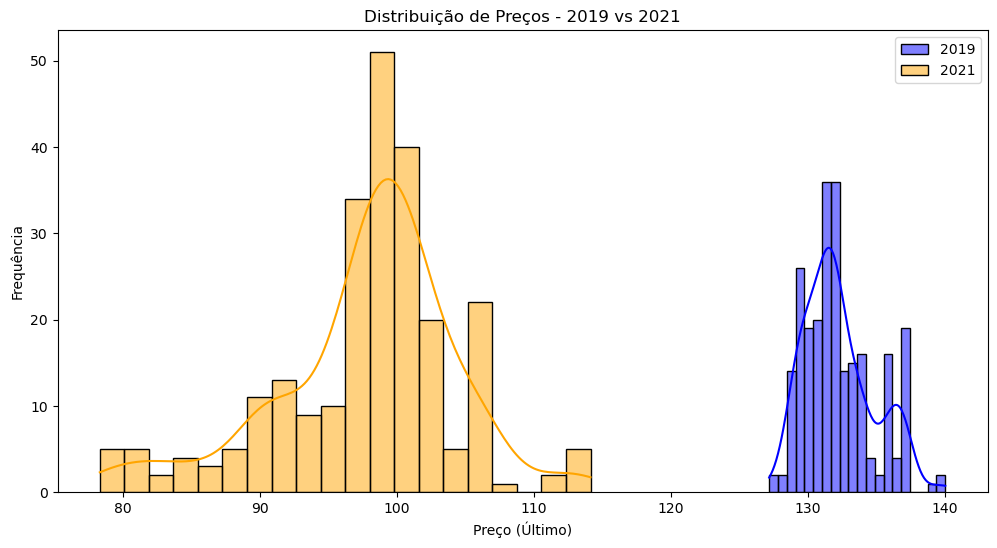

In [407]:
plt.figure(figsize=(12, 6))

sns.histplot(dados_2019, kde=True, color="blue", label="2019", bins=20)

sns.histplot(dados_2021, kde=True, color="orange", label="2021", bins=20)

plt.title("Distribuição de Preços - 2019 vs 2021")
plt.xlabel("Preço (Último)")
plt.ylabel("Frequência")
plt.legend()
plt.show()

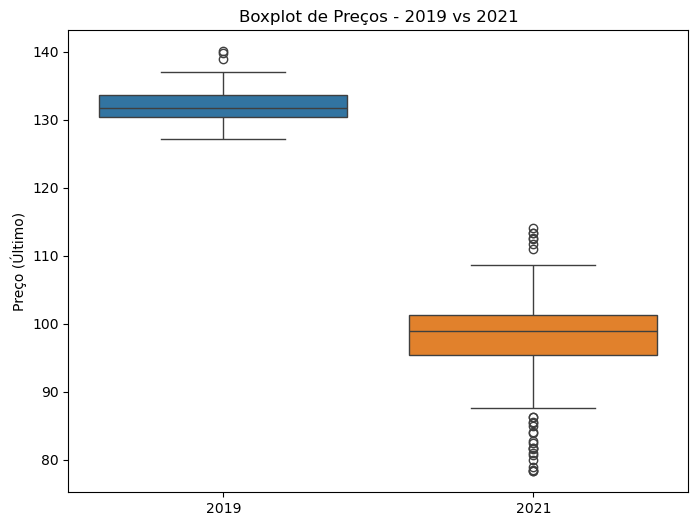

In [408]:
plt.figure(figsize=(8, 6))

dados_comparacao = pd.DataFrame({
    "2019": dados_2019,
    "2021": dados_2021
})

sns.boxplot(data=dados_comparacao)
plt.title("Boxplot de Preços - 2019 vs 2021")
plt.ylabel("Preço (Último)")
plt.show()


2019 (Assimetria Positiva):
A distribuição tende a ter mais valores concentrados à esquerda da média.
Sugere que os preços estavam mais estáveis antes da pandemia, com picos positivos ocasionais.

2021 (Assimetria Negativa):
A distribuição tende a ter mais valores concentrados à direita da média.
Sugere que houve quedas acentuadas nos preços devido aos impactos da pandemia e possíveis incertezas econômicas.

Relação com a COVID-19:
O início da pandemia em 2020 gerou alta volatilidade e incertezas no mercado financeiro, o que pode ter causado mudanças nos padrões de preços em 2021.
A recuperação parcial ou total em setores específicos pode ser analisada por meio da redução da assimetria ao longo do tempo.

In [410]:
retorno_medio_ativo = df_bbrc["Retorno"].mean()
volatilidade_ativo = df_bbrc["Retorno"].std()
selic_anual = df_selic["selic_meta"].mean()

sharpe_ratio = (retorno_medio_ativo - selic_anual) / volatilidade_ativo
print(f"Índice de Sharpe: {sharpe_ratio:.4f}")

Índice de Sharpe: -597.7488


Quanto maior o índice, melhor o retorno ajustado ao risco.

Valores acima de 1 são considerados bons; acima de 2, excelentes.

Valores negativos indicam que o ativo está performando abaixo da taxa livre de risco.

In [412]:
precos = df_bbrc["Ultimo"]
pico_acumulado = precos.cummax()

drawdown_diario = (precos - pico_acumulado) / pico_acumulado

drawdown_maximo = drawdown_diario.min()
print(f"Drawdown Máximo: {drawdown_maximo:.2%}")

Drawdown Máximo: -53.27%


Mostra a maior queda que um investidor teria enfrentado mantendo o ativo.

Quanto menor o drawdown máximo, menor o risco de grandes perdas em eventos extremos.